# Load in data

In [114]:
!pip install geopy
from geopy.geocoders import Nominatim
from geopy.distance import geodesic
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras import backend as K
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report



# Load the datasets
labels_df = pd.read_csv('/Users/tedhu/OneDrive/Documents/PLP4932_First_Project/2labels.csv', encoding='ISO-8859-1')
rain_df = pd.read_csv('/Users/tedhu/OneDrive/Documents/PLP4932_First_Project/1rain.csv', encoding='ISO-8859-1')
temp_df = pd.read_csv('/Users/tedhu/OneDrive/Documents/PLP4932_First_Project/1temp.csv', encoding='ISO-8859-1')
trade_df = pd.read_csv('/Users/tedhu/OneDrive/Documents/PLP4932_First_Project/1trade.csv', encoding='ISO-8859-1')


k_temp = 1  # Constant for temperature modifier
k_precip = 1  # Constant for precipitation modifier
optimal_temp = 26.5  # Optimal temperature
optimal_precip = 0  # Optimal precipitation
attenuation = 2  # Attenuation value

# Country coordinates 
country_coordinates = {
    "Bulgaria": (42.7339, 25.4858),
    "Croatia": (45.1, 15.2),
    "France": (46.2276, 2.2137),
    "Greece": (39.0742, 21.8243),
    "Hungary": (47.1625, 19.5033),
    "Italy": (41.8719, 12.5674),
    "Portugal": (39.3999, -8.2245),
    "Romania": (45.9432, 24.9668),
    "Russia": (61.5240, 105.3188),
    "Spain": (40.4637, -3.7492),
    "Ukraine": (48.3794, 31.1656),
    "Afghanistan": (33.9391, 67.7100),
    "Bangladesh": (23.6850, 90.3563),
    "Bhutan": (27.5142, 90.4336),
    "Brunei Darussalam": (4.5353, 114.7277),
    "Cambodia": (12.5657, 104.9910),
    "China": (35.8617, 104.1954),
    "Georgia": (42.3154, 43.3569),
    "India": (20.5937, 78.9629),
    "Indonesia": (0.7893, 113.9213),
    "Iran": (32.4279, 53.6880),
    "Iraq": (33.2232, 43.6793),
    "Japan": (36.2048, 138.2529),
    "Kazakhstan": (48.0196, 66.9237),
    "Korea Republic": (35.9078, 127.7669),
    "Laos": (19.8563, 102.4955),
    "Malaysia": (4.2105, 101.9758),
    "Myanmar": (21.9162, 95.9560),
    "Nepal": (28.3949, 84.1240),
    "Pakistan": (30.3753, 69.3451),
    "Philippines": (12.8797, 121.7740),
    "Sri Lanka": (7.8731, 80.7718),
    "Taiwan": (23.6978, 120.9605),
    "Thailand": (15.8700, 100.9925),
    "Turkey": (38.9637, 35.2433),
    "Uzbekistan": (41.3775, 64.5853),
    "Vietnam": (14.0583, 108.2772),
    "Angola": (11.2027, 17.8739),
    "Benin": (9.3077, 2.3158),
    "Burkina Faso": (12.2383, -1.5616),
    "Burundi": (3.3731, 29.9189),
    "Cameroon": (7.3697, 12.3547),
    "Chad": (15.4542, 18.7322),
    "Congo": (0.2280, 15.8277),
    "Cote d'Ivoire": (7.5399, -5.5471),
    "Egypt": (26.8206, 30.8025),
    "Ethiopia": (9.1450, 40.4897),
    "Gabon": (0.8037, 11.6094),
    "Gambia": (13.4432, -15.3101),
    "Ghana": (7.9465, -1.0232),
    "Guinea": (9.9456, -9.6966),
    "Kenya": (1.2921, 36.8219),
    "Liberia": (6.4281, -9.4295),
    "Madagascar": (18.7669, 46.8691),
    "Malawi": (13.2543, 34.3015),
    "Mali": (17.5707, -3.9962),
    "Mauritius": (20.3484, 57.5522),
    "Morocco": (31.7917, -7.0926),
    "Mozambique": (18.6657, 35.5296),
    "Niger": (17.6078, 8.0817),
    "Nigeria": (9.0820, 8.6753),
    "Senegal": (14.4974, -14.4524),
    "Sierra Leone": (8.4606, -11.7799),
    "South Africa": (30.5595, 22.9375),
    "Sudan": (12.8628, 30.2176),
    "Tanzania": (6.3690, 34.8888),
    "Togo": (8.6195, 0.8248),
    "Uganda": (1.3733, 32.2903),
    "Zambia": (13.1339, 27.8493),
    "Zimbabwe": (19.0154, 29.1549),
    "Mexico": (23.6345, -102.5528),
    "United States of America": (37.0902, -95.7129),
    "Belize": (17.1899, -88.4976),
    "Costa Rica": (9.7489, -83.7534),
    "Cuba": (21.5218, -77.7812),
    "Dominican Republic": (18.7357, -70.1627),
    "El Salvador": (13.7942, -88.8965),
    "Guatemala": (15.7835, -90.2308),
    "Haiti": (18.9712, -72.2852),
    "Honduras": (15.2000, -86.2419),
    "Jamaica": (18.1096, -77.2975),
    "Nicaragua": (12.8654, -85.2072),
    "Panama": (8.5370, -80.7821),
    "Puerto Rico": (18.2208, -66.5901),
    "Trinidad and Tobago": (10.6918, -61.2225),
    "Argentina": (38.4161, -63.6167),
    "Brazil": (14.2350, -51.9253),
    "Colombia": (4.5709, -74.2973),
    "French Guiana": (3.9339, -53.1258),
    "Guyana": (4.8604, -58.9302),
    "Paraguay": (23.4425, -58.4438),
    "Peru": (9.1900, -75.0152),
    "Suriname": (3.9193, -56.0278),
    "Uruguay": (32.5228, -55.7658),
    "Venezuela": (6.4238, -66.5897),
    "Australia": (25.2744, 133.7751),
    "Fiji": (17.7134, 178.0650),
    "New Caledonia": (20.9043, 165.6180),
    "Papua New Guinea": (6.3140, 143.9555)
}

# Tri-Model

In [115]:
# Define temperature and precipitation modifiers
def temp_modifier(temperature):
    return np.exp(-k_temp * (temperature - optimal_temp)**2) 

def precip_modifier(precipitation):
    return 1 / (1 + np.exp(-k_precip * (precipitation - optimal_precip))) 

# Function to calculate invasion potential 
def calculate_invasion_potential(import_country, year_detected):
    temp = temp_df.query("Country == @import_country and Year == @year_detected")['Annual mean temp (C)'].values
    precip = rain_df.query("Country == @import_country and Year == @year_detected")['Average precipitation (mm)'].values
    
    temp_factor = temp_modifier(temp[0] if len(temp) > 0 else 0)
    precip_factor = precip_modifier(precip[0] if len(precip) > 0 else 0)

    import_country_coords = country_coordinates.get(import_country)
    ip_contributions = []
    reporter_countries = trade_df.query("Year == @year_detected")['Reporter Countries'].unique()

    for reporter_country in reporter_countries:
        pest_extent = labels_df.query("Country == @reporter_country and `Year First Detected` <= @year_detected")['Pest Extent'].values
        trade_quantity = trade_df.query("`Reporter Countries` == @reporter_country and `Partner Countries` == @import_country and Year == @year_detected")['Tons'].sum()

        reporter_country_coords = country_coordinates.get(reporter_country)
        if import_country_coords and reporter_country_coords:
            distance = geodesic(import_country_coords, reporter_country_coords).kilometers
            ip_contribution = ((1 + trade_quantity) * (1 + (pest_extent[0] if len(pest_extent) > 0 else 0))) / (1 + distance ** attenuation if distance else 1)
            ip_contributions.append(ip_contribution)

    total_ip = (1 + temp_factor) * (1 + precip_factor) * sum(ip_contributions) 
    return total_ip

# Calculate IPs for all countries in labels
labels_df['Invasion Potential'] = labels_df.apply(lambda row: calculate_invasion_potential(row['Country'], row['Year First Detected']), axis=1)

# Split data into features and target
X = labels_df[['Invasion Potential']].values
y = labels_df['Pest Extent'].values

y -= y.min()
num_classes = 7

# Split the data into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Define the ANN model
model = Sequential([
    Dense(50, activation='relu', input_shape=(1,)),
    Dense(50, activation='relu'),
    Dense(num_classes, activation='softmax')  
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_val, y_val))

# Evaluate the model's performance on the training data
train_loss, train_accuracy = model.evaluate(X_train, y_train, verbose=0)
# Evaluate the model's performance on the validation data
val_loss, val_accuracy = model.evaluate(X_val, y_val, verbose=0)
# Evaluate the model's performance on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)



Epoch 1/30


C:\Users\tedhu\anaconda3.0\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6100 - loss: 1.6511 - val_accuracy: 0.8742 - val_loss: 1.3400
Epoch 2/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8672 - loss: 1.3104 - val_accuracy: 0.8742 - val_loss: 1.2575
Epoch 3/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8654 - loss: 1.2149 - val_accuracy: 0.8742 - val_loss: 1.1972
Epoch 4/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8275 - loss: 1.2651 - val_accuracy: 0.8742 - val_loss: 1.1457
Epoch 5/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8561 - loss: 1.1566 - val_accuracy: 0.8742 - val_loss: 1.0742
Epoch 6/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8649 - loss: 1.0402 - val_accuracy: 0.8742 - val_loss: 1.0137
Epoch 7/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8509 - loss: 1.0256 - val_accuracy: 0.8742 - val_loss: 0.9430
Epoch 8/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8548 - loss: 0.8852 - val_accuracy: 0.8742 - val_loss: 0.8872
Epo

In [116]:
# Output the accuracies
print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Validation Accuracy: {val_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")

Training Accuracy: 0.86
Validation Accuracy: 0.87
Test Accuracy: 0.89


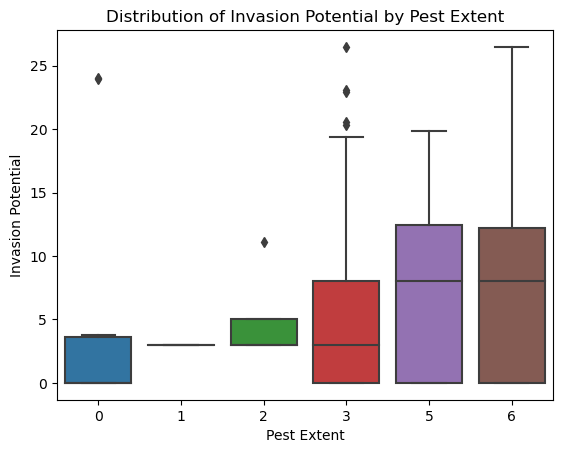

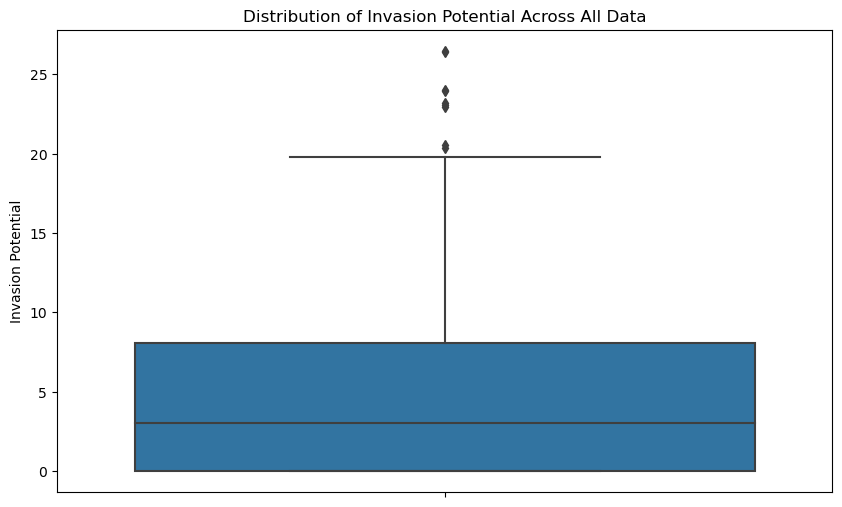

In [117]:
sns.boxplot(x=labels_df['Pest Extent'], y=labels_df['Invasion Potential'])
plt.title('Distribution of Invasion Potential by Pest Extent')
plt.show()


plt.figure(figsize=(10, 6))
sns.boxplot(y=labels_df['Invasion Potential'])
plt.title('Distribution of Invasion Potential Across All Data')
plt.ylabel('Invasion Potential')
plt.show()

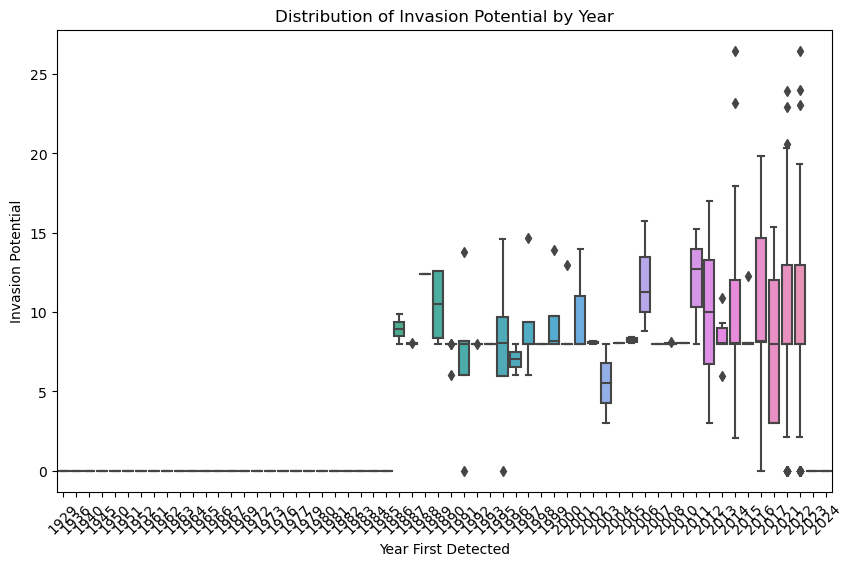

In [118]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=labels_df['Year First Detected'], y=labels_df['Invasion Potential'])
plt.title('Distribution of Invasion Potential by Year')
plt.xlabel('Year First Detected')
plt.ylabel('Invasion Potential')
plt.xticks(rotation=45)  
plt.show()

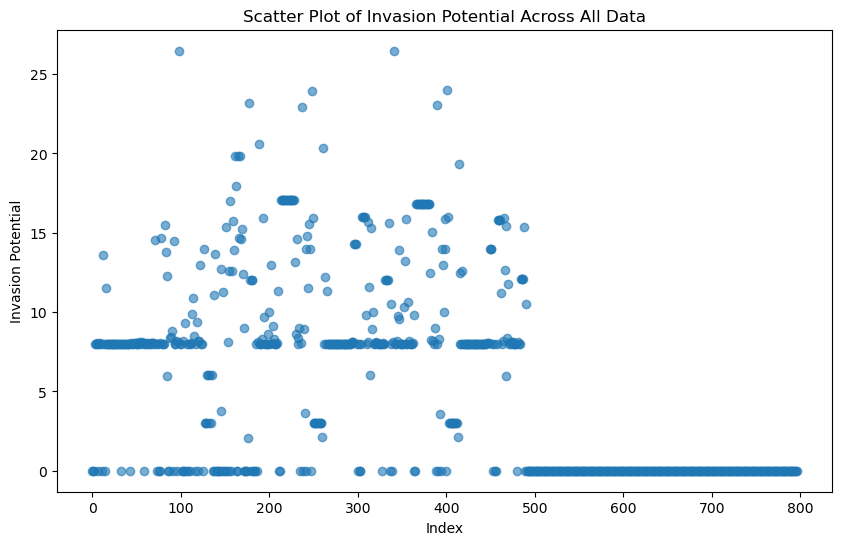

In [119]:
# Plotting Invasion Potential for the entire dataset
plt.figure(figsize=(10, 6))
plt.scatter(range(len(labels_df)), labels_df['Invasion Potential'], alpha=0.6)
plt.title('Scatter Plot of Invasion Potential Across All Data')
plt.ylabel('Invasion Potential')
plt.xlabel('Index')
plt.show()

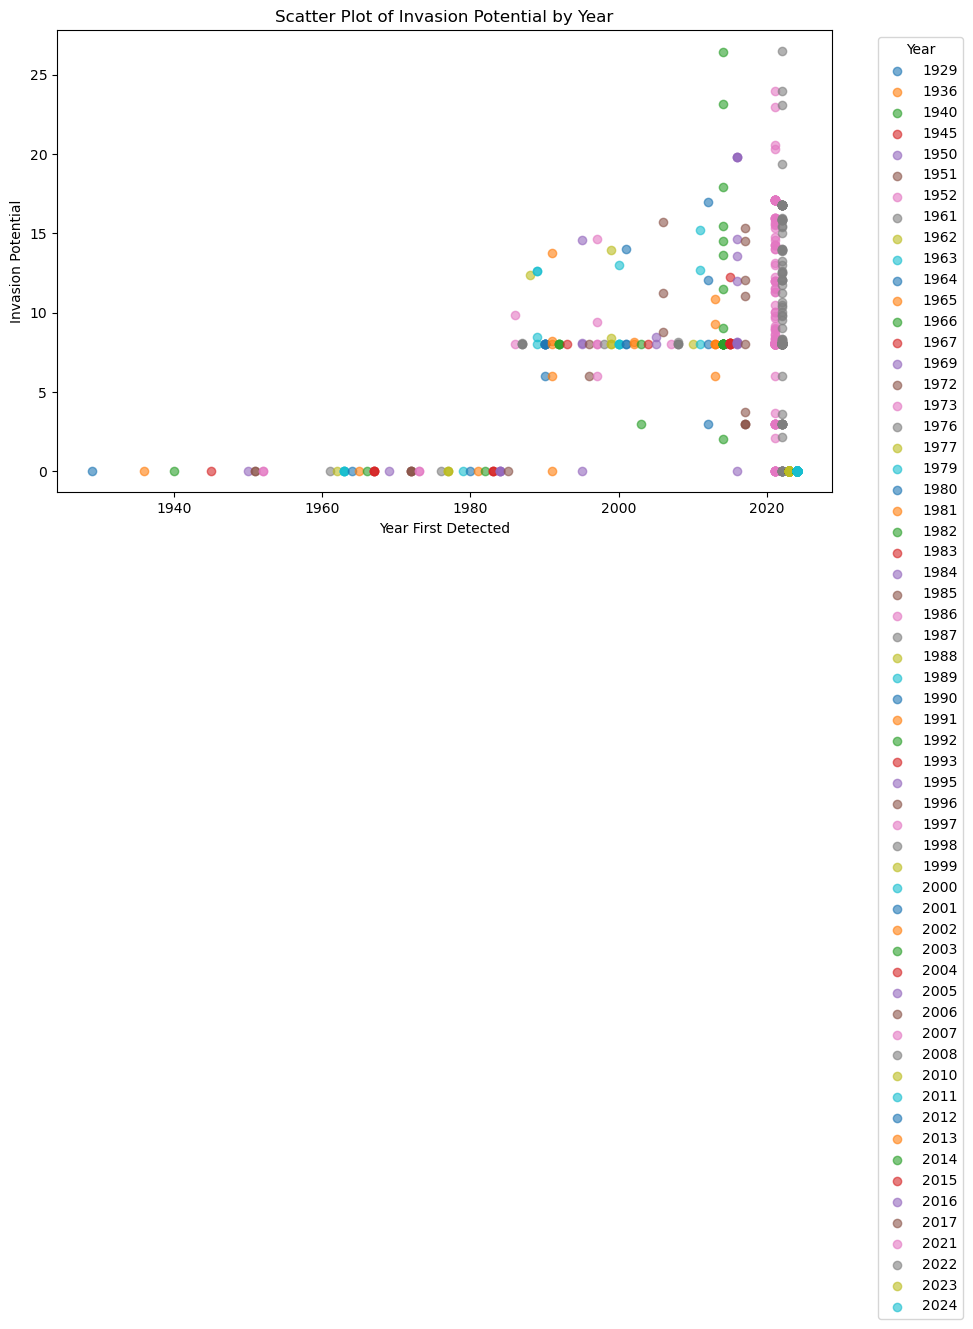

In [120]:
# Plotting Invasion Potential by Year
plt.figure(figsize=(10, 6))
for year in sorted(labels_df['Year First Detected'].unique()):
    subset = labels_df[labels_df['Year First Detected'] == year]
    plt.scatter([year] * len(subset), subset['Invasion Potential'], alpha=0.6, label=str(year))

plt.title('Scatter Plot of Invasion Potential by Year')
plt.xlabel('Year First Detected')
plt.ylabel('Invasion Potential')
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 869us/step


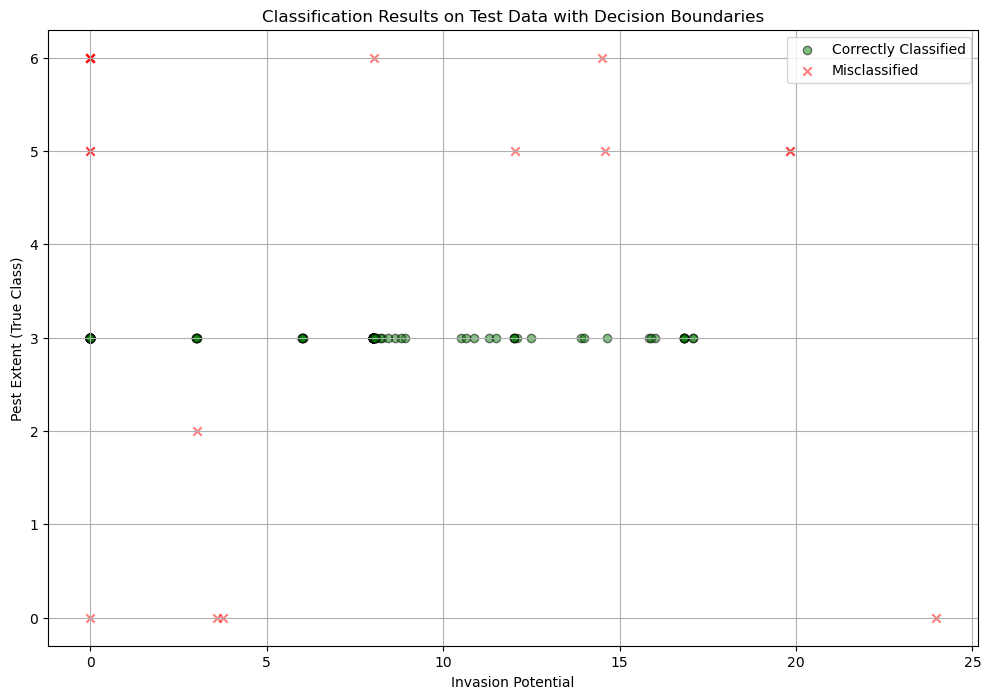

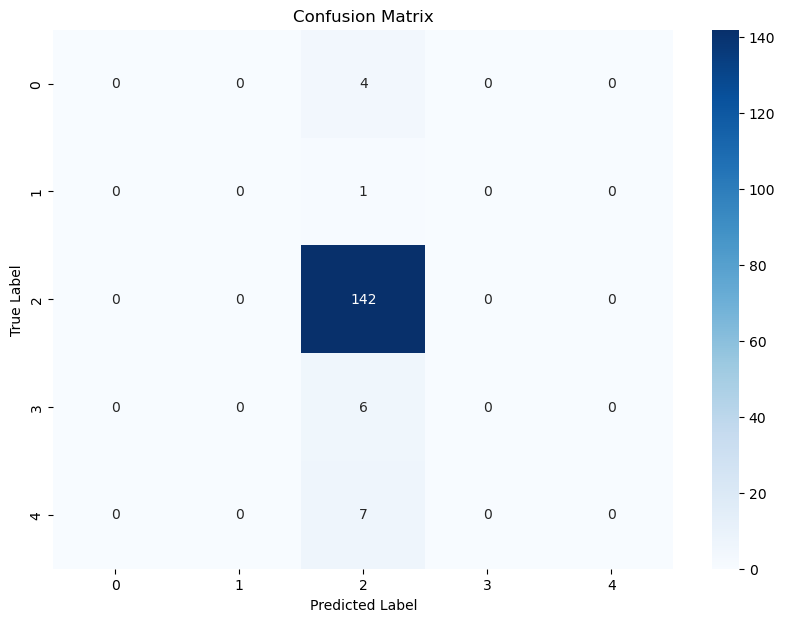

In [121]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)


correct_indices = np.nonzero(y_pred_classes == y_test)[0]
misclassified_indices = np.nonzero(y_pred_classes != y_test)[0]


sorted_indices = np.argsort(X_test.flatten())
sorted_X_test = X_test.flatten()[sorted_indices]
sorted_y_pred_classes = y_pred_classes[sorted_indices]

# Plotting
plt.figure(figsize=(12, 8))
plt.scatter(X_test[correct_indices], y_test[correct_indices], color='green', label='Correctly Classified', alpha=0.5, edgecolor='k')
plt.scatter(X_test[misclassified_indices], y_test[misclassified_indices], color='red', label='Misclassified', alpha=0.5, marker='x')


plt.title('Classification Results on Test Data with Decision Boundaries')
plt.xlabel('Invasion Potential')
plt.ylabel('Pest Extent (True Class)')
plt.legend()
plt.grid(True)
plt.show()


cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Duo-Model

In [122]:
def calculate_invasion_potential_duo(import_country, year_detected):

    import_country_coords = country_coordinates.get(import_country)
    ip_contributions = []
    reporter_countries = trade_df.query("Year == @year_detected")['Reporter Countries'].unique()

    for reporter_country in reporter_countries:
        pest_extent = labels_df.query("Country == @reporter_country and `Year First Detected` <= @year_detected")['Pest Extent'].values
        trade_quantity = trade_df.query("`Reporter Countries` == @reporter_country and `Partner Countries` == @import_country and Year == @year_detected")['Tons'].sum()

        reporter_country_coords = country_coordinates.get(reporter_country)
        if import_country_coords and reporter_country_coords:
            distance = geodesic(import_country_coords, reporter_country_coords).kilometers
            ip_contribution = ((1 + trade_quantity) * (1 + (pest_extent[0] if len(pest_extent) > 0 else 0))) / (distance ** attenuation if distance else 1)
            ip_contributions.append(ip_contribution)

    total_ip =  sum(ip_contributions) if ip_contributions else 0
    return total_ip


labels_df['Invasion Potential'] = labels_df.apply(lambda row: calculate_invasion_potential_duo(row['Country'], row['Year First Detected']), axis=1)

# Split data into features and target
X = labels_df[['Invasion Potential']].values
y = labels_df['Pest Extent'].values

y -= y.min()
num_classes = 7

# Split the data into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Define the ANN model
model = Sequential([
    Dense(50, activation='relu', input_shape=(1,)),
    Dense(50, activation='relu'),
    Dense(num_classes, activation='softmax')  
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_val, y_val))

# Evaluate the model's performance on the training data
train_loss, train_accuracy = model.evaluate(X_train, y_train, verbose=0)
# Evaluate the model's performance on the validation data
val_loss, val_accuracy = model.evaluate(X_val, y_val, verbose=0)
# Evaluate the model's performance on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)

Epoch 1/30


C:\Users\tedhu\anaconda3.0\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.4754 - loss: 1.8178 - val_accuracy: 0.8742 - val_loss: 1.4691
Epoch 2/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8542 - loss: 1.3842 - val_accuracy: 0.8742 - val_loss: 1.2239
Epoch 3/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8773 - loss: 1.1266 - val_accuracy: 0.8742 - val_loss: 1.1275
Epoch 4/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8924 - loss: 0.9859 - val_accuracy: 0.8742 - val_loss: 1.0541
Epoch 5/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8496 - loss: 1.0789 - val_accuracy: 0.8742 - val_loss: 0.9823
Epoch 6/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8781 - loss: 0.9505 - val_accuracy: 0.8742 - val_loss: 0.9003
Epoch 7/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8718 - loss: 0.9003 - val_accuracy: 0.8742 - val_loss: 0.8268
Epoch 8/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8397 - loss: 0.8906 - val_accuracy: 0.8742 - val_loss: 0.7530
Epo

In [123]:
# Output the accuracies
print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Validation Accuracy: {val_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")

Training Accuracy: 0.86
Validation Accuracy: 0.87
Test Accuracy: 0.89


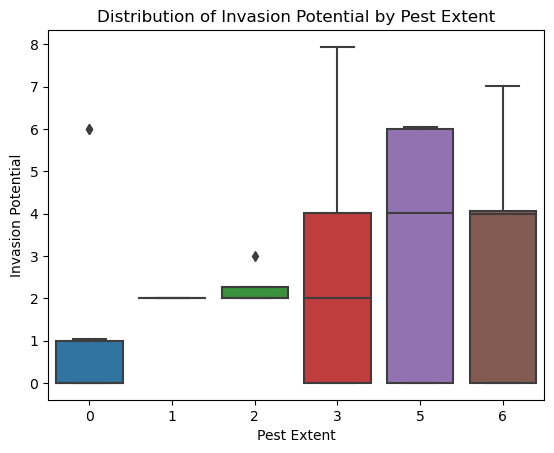

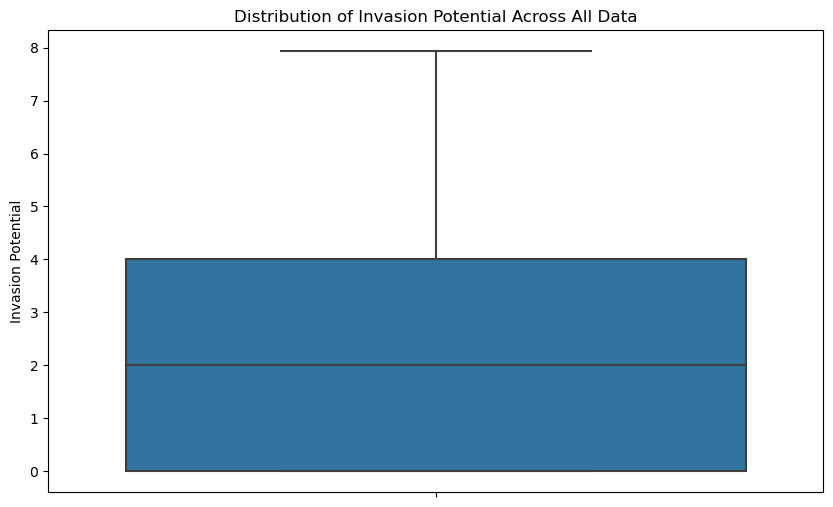

In [124]:
sns.boxplot(x=labels_df['Pest Extent'], y=labels_df['Invasion Potential'])
plt.title('Distribution of Invasion Potential by Pest Extent')
plt.show()

# Plotting Invasion Potential for the entire dataset
plt.figure(figsize=(10, 6))
sns.boxplot(y=labels_df['Invasion Potential'])
plt.title('Distribution of Invasion Potential Across All Data')
plt.ylabel('Invasion Potential')
plt.show()

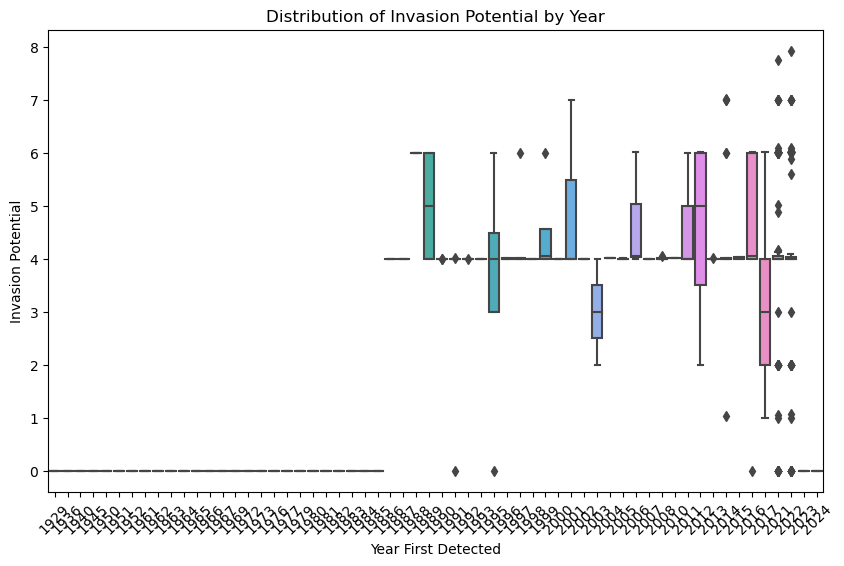

In [125]:
# Plotting Invasion Potential by Year
plt.figure(figsize=(10, 6))
sns.boxplot(x=labels_df['Year First Detected'], y=labels_df['Invasion Potential'])
plt.title('Distribution of Invasion Potential by Year')
plt.xlabel('Year First Detected')
plt.ylabel('Invasion Potential')
plt.xticks(rotation=45) 
plt.show()

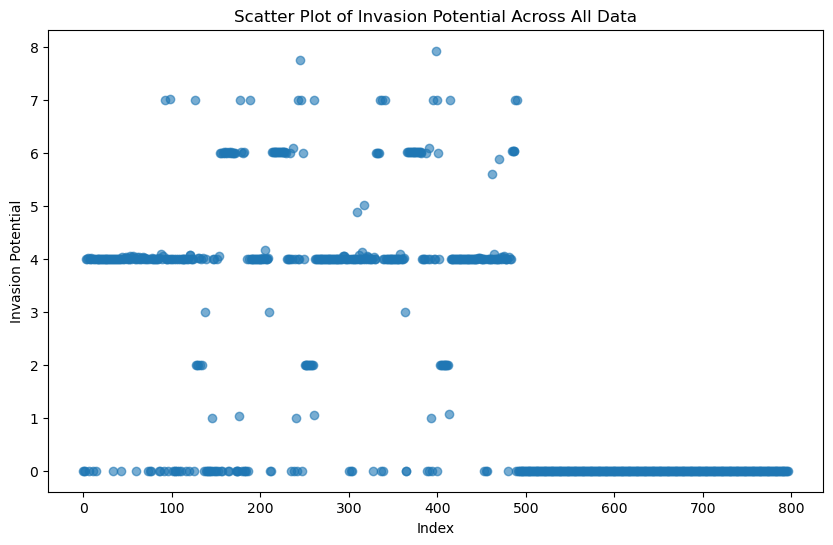

In [126]:

plt.figure(figsize=(10, 6))
plt.scatter(range(len(labels_df)), labels_df['Invasion Potential'], alpha=0.6)
plt.title('Scatter Plot of Invasion Potential Across All Data')
plt.ylabel('Invasion Potential')
plt.xlabel('Index')
plt.show()

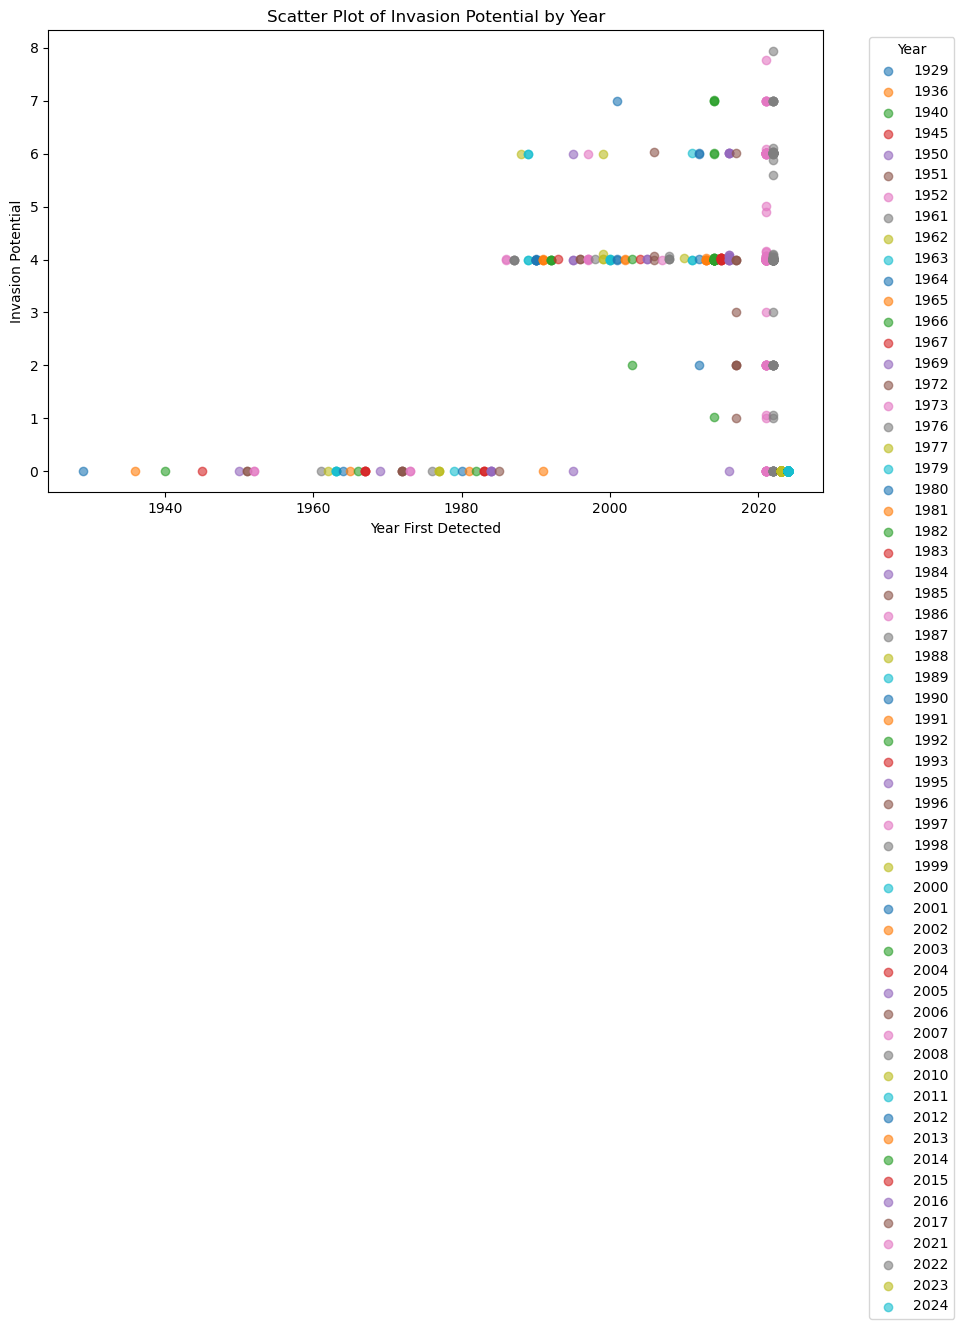

In [127]:

plt.figure(figsize=(10, 6))
for year in sorted(labels_df['Year First Detected'].unique()):
    subset = labels_df[labels_df['Year First Detected'] == year]
    plt.scatter([year] * len(subset), subset['Invasion Potential'], alpha=0.6, label=str(year))

plt.title('Scatter Plot of Invasion Potential by Year')
plt.xlabel('Year First Detected')
plt.ylabel('Invasion Potential')
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 868us/step


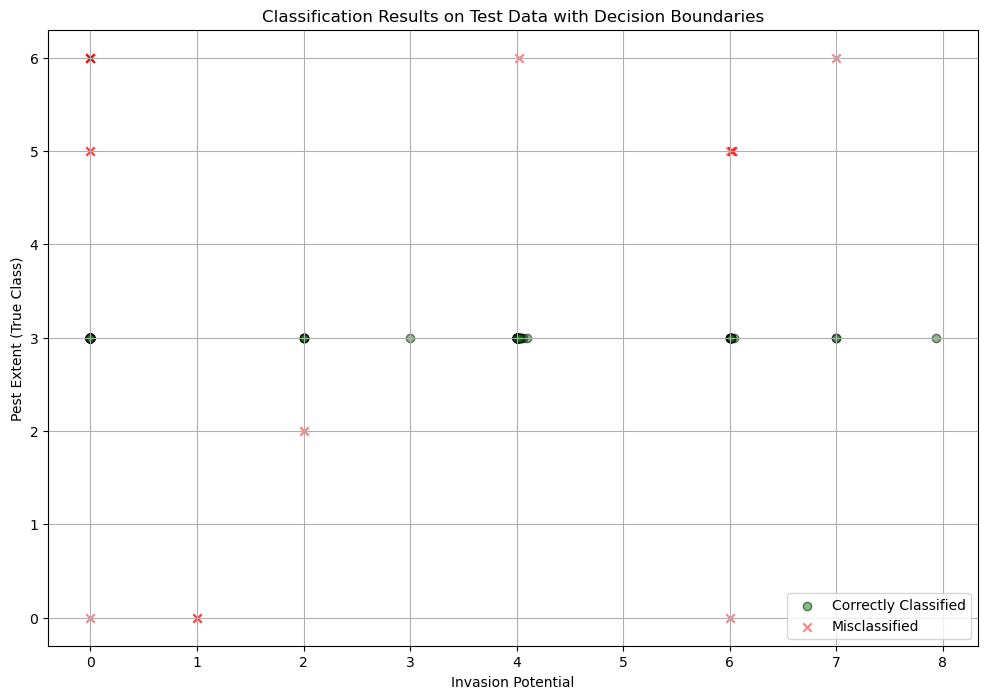

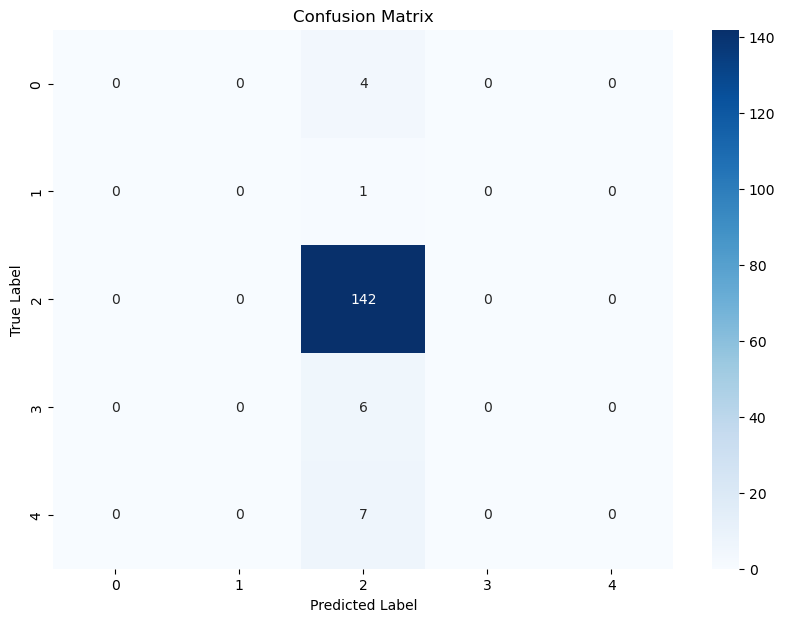

In [128]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)


correct_indices = np.nonzero(y_pred_classes == y_test)[0]
misclassified_indices = np.nonzero(y_pred_classes != y_test)[0]


sorted_indices = np.argsort(X_test.flatten())
sorted_X_test = X_test.flatten()[sorted_indices]
sorted_y_pred_classes = y_pred_classes[sorted_indices]


plt.figure(figsize=(12, 8))
plt.scatter(X_test[correct_indices], y_test[correct_indices], color='green', label='Correctly Classified', alpha=0.5, edgecolor='k')
plt.scatter(X_test[misclassified_indices], y_test[misclassified_indices], color='red', label='Misclassified', alpha=0.5, marker='x')



plt.title('Classification Results on Test Data with Decision Boundaries')
plt.xlabel('Invasion Potential')
plt.ylabel('Pest Extent (True Class)')
plt.legend()
plt.grid(True)
plt.show()


cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


# Single - Model

In [129]:
# Function to calculate invasion potential
def calculate_invasion_potential(import_country, year_detected):

    import_country_coords = country_coordinates.get(import_country)
    ip_contributions = []
    reporter_countries = trade_df.query("Year == @year_detected")['Reporter Countries'].unique()

    for reporter_country in reporter_countries:
        pest_extent = labels_df.query("Country == @reporter_country and `Year First Detected` <= @year_detected")['Pest Extent'].values
        trade_quantity = trade_df.query("`Reporter Countries` == @reporter_country and `Partner Countries` == @import_country and Year == @year_detected")['Tons'].sum()

        reporter_country_coords = country_coordinates.get(reporter_country)
        if import_country_coords and reporter_country_coords:
            distance = geodesic(import_country_coords, reporter_country_coords).kilometers
            ip_contribution = ((1 + (pest_extent[0] if len(pest_extent) > 0 else 0))) / (distance ** attenuation if distance else 1)
            ip_contributions.append(ip_contribution)

    total_ip =  sum(ip_contributions) if ip_contributions else 0
    return total_ip

# Calculate IPs for all countries in labels
labels_df['Invasion Potential'] = labels_df.apply(lambda row: calculate_invasion_potential(row['Country'], row['Year First Detected']), axis=1)

# Split data into features and target
X = labels_df[['Invasion Potential']].values
y = labels_df['Pest Extent'].values

y -= y.min()
num_classes = 7

# Split the data into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Define the ANN model
model = Sequential([
    Dense(50, activation='relu', input_shape=(1,)),
    Dense(50, activation='relu'),
    Dense(num_classes, activation='softmax')  # Output layer nodes equal to number of unique labels
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_val, y_val))

# Evaluate the model's performance on the training data
train_loss, train_accuracy = model.evaluate(X_train, y_train, verbose=0)
# Evaluate the model's performance on the validation data
val_loss, val_accuracy = model.evaluate(X_val, y_val, verbose=0)
# Evaluate the model's performance on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)

Epoch 1/30


C:\Users\tedhu\anaconda3.0\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.3681 - loss: 2.0601 - val_accuracy: 0.8616 - val_loss: 1.7223
Epoch 2/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8241 - loss: 1.6222 - val_accuracy: 0.8742 - val_loss: 1.3952
Epoch 3/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8722 - loss: 1.3249 - val_accuracy: 0.8742 - val_loss: 1.1891
Epoch 4/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8762 - loss: 1.1321 - val_accuracy: 0.8742 - val_loss: 1.0900
Epoch 5/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8512 - loss: 1.0841 - val_accuracy: 0.8742 - val_loss: 1.0189
Epoch 6/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8667 - loss: 0.9911 - val_accuracy: 0.8742 - val_loss: 0.9497
Epoch 7/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8602 - loss: 0.9390 - val_accuracy: 0.8742 - val_loss: 0.8861
Epoch 8/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8778 - loss: 0.8859 - val_accuracy: 0.8742 - val_loss: 0.8183
Epo

In [130]:
# Output the accuracies
print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Validation Accuracy: {val_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")

Training Accuracy: 0.86
Validation Accuracy: 0.87
Test Accuracy: 0.89


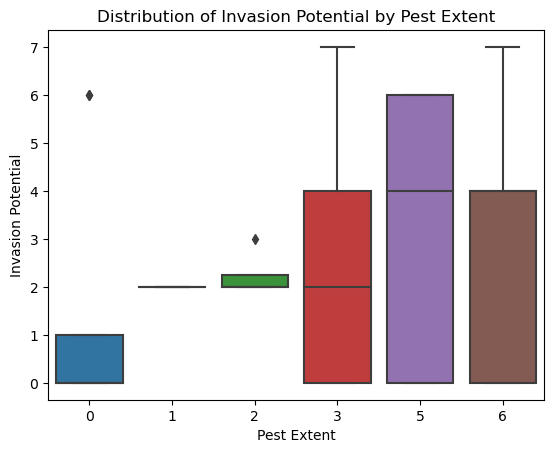

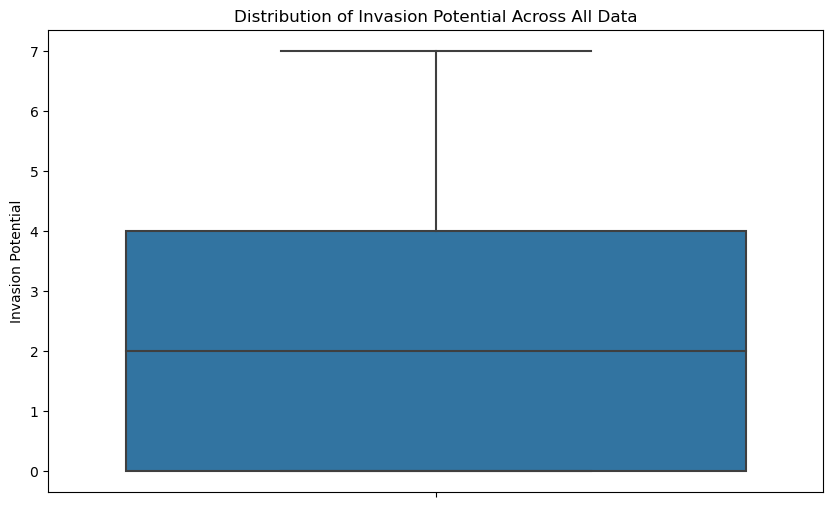

In [131]:
sns.boxplot(x=labels_df['Pest Extent'], y=labels_df['Invasion Potential'])
plt.title('Distribution of Invasion Potential by Pest Extent')
plt.show()


plt.figure(figsize=(10, 6))
sns.boxplot(y=labels_df['Invasion Potential'])
plt.title('Distribution of Invasion Potential Across All Data')
plt.ylabel('Invasion Potential')
plt.show()

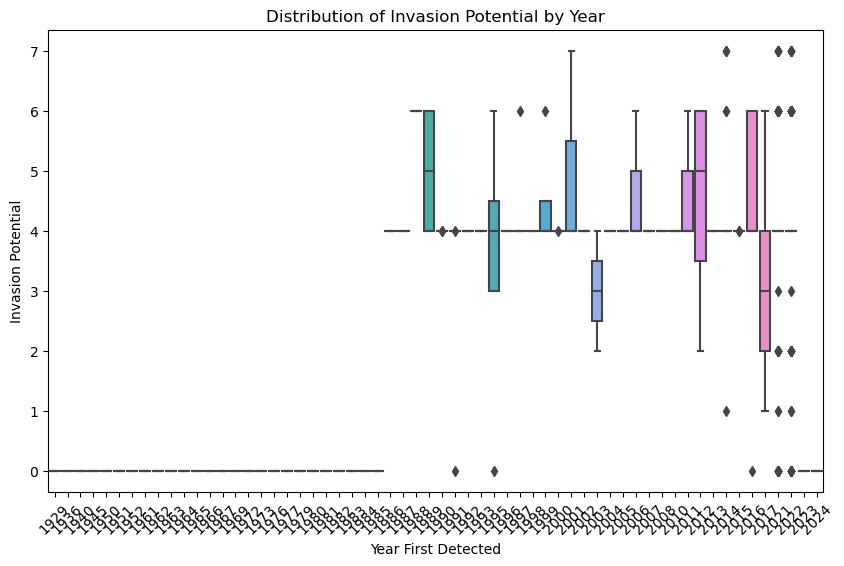

In [132]:
# Plotting Invasion Potential by Year
plt.figure(figsize=(10, 6))
sns.boxplot(x=labels_df['Year First Detected'], y=labels_df['Invasion Potential'])
plt.title('Distribution of Invasion Potential by Year')
plt.xlabel('Year First Detected')
plt.ylabel('Invasion Potential')
plt.xticks(rotation=45)  
plt.show()

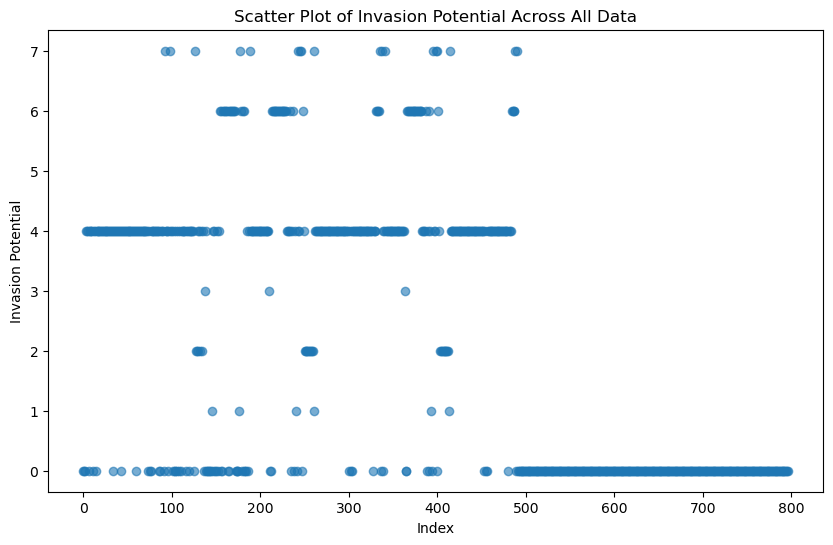

In [133]:
# Plotting Invasion Potential for the entire dataset
plt.figure(figsize=(10, 6))
plt.scatter(range(len(labels_df)), labels_df['Invasion Potential'], alpha=0.6)
plt.title('Scatter Plot of Invasion Potential Across All Data')
plt.ylabel('Invasion Potential')
plt.xlabel('Index')
plt.show()

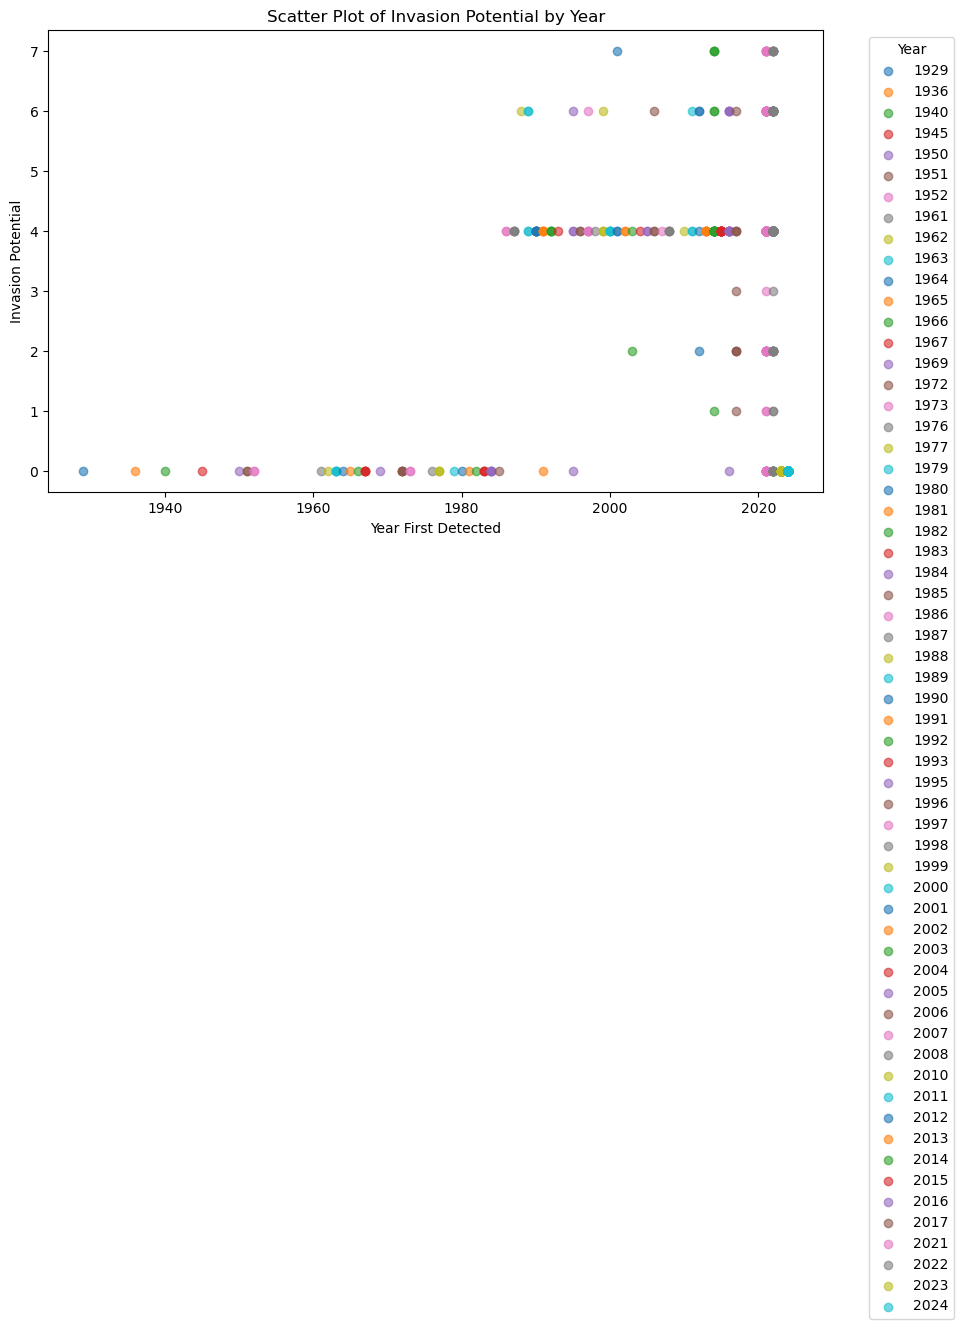

In [134]:
# Plotting Invasion Potential by Year
plt.figure(figsize=(10, 6))
for year in sorted(labels_df['Year First Detected'].unique()):
    subset = labels_df[labels_df['Year First Detected'] == year]
    plt.scatter([year] * len(subset), subset['Invasion Potential'], alpha=0.6, label=str(year))

plt.title('Scatter Plot of Invasion Potential by Year')
plt.xlabel('Year First Detected')
plt.ylabel('Invasion Potential')
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 992us/step


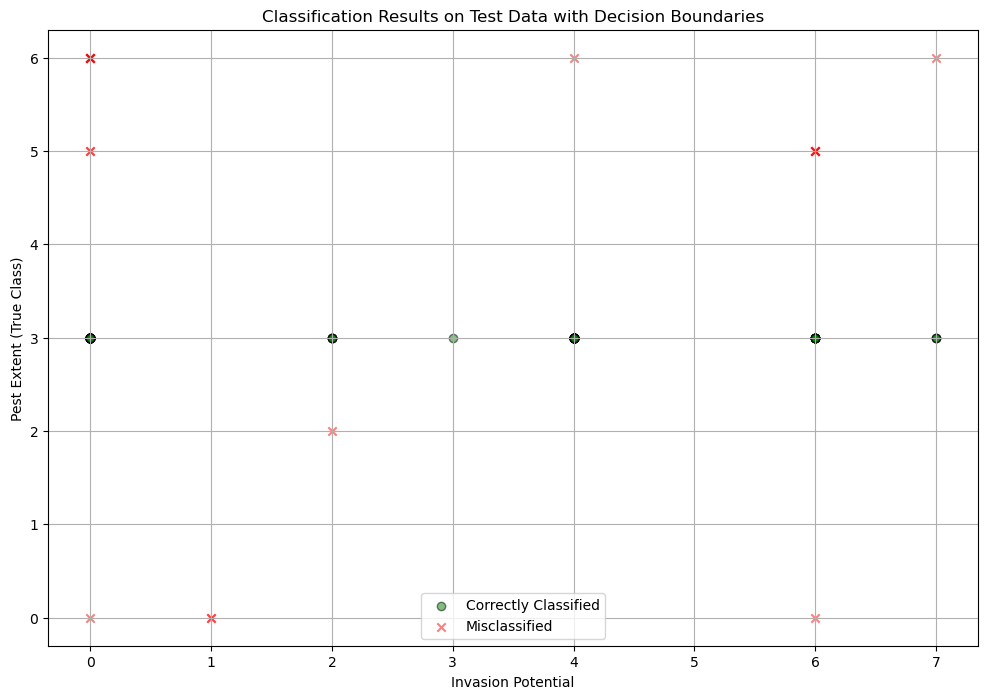

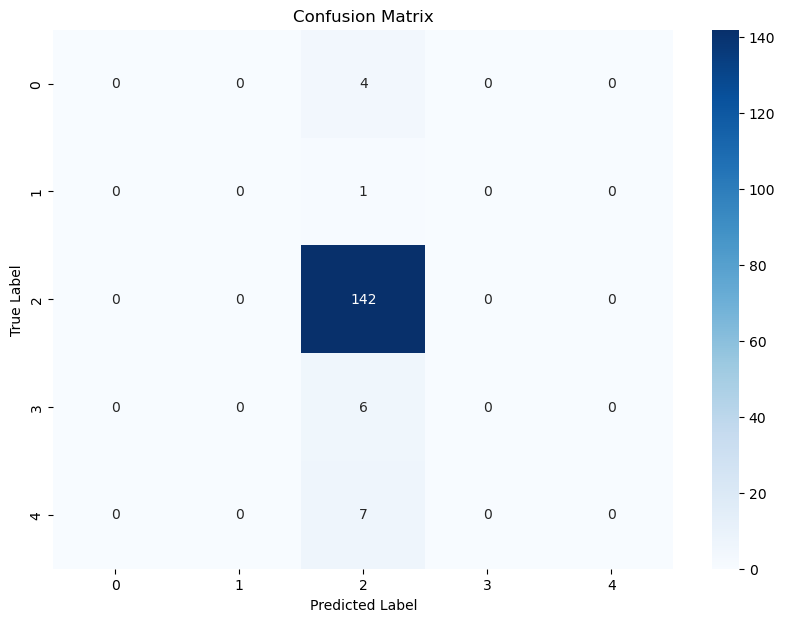

In [135]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)


correct_indices = np.nonzero(y_pred_classes == y_test)[0]
misclassified_indices = np.nonzero(y_pred_classes != y_test)[0]


sorted_indices = np.argsort(X_test.flatten())
sorted_X_test = X_test.flatten()[sorted_indices]
sorted_y_pred_classes = y_pred_classes[sorted_indices]


plt.figure(figsize=(12, 8))
plt.scatter(X_test[correct_indices], y_test[correct_indices], color='green', label='Correctly Classified', alpha=0.5, edgecolor='k')
plt.scatter(X_test[misclassified_indices], y_test[misclassified_indices], color='red', label='Misclassified', alpha=0.5, marker='x')


plt.title('Classification Results on Test Data with Decision Boundaries')
plt.xlabel('Invasion Potential')
plt.ylabel('Pest Extent (True Class)')
plt.legend()
plt.grid(True)
plt.show()


cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


# Tri-Model (Regression)

In [87]:
import pandas as pd
import numpy as np
from geopy.distance import geodesic
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras import backend as K



# Define modifiers for temperature and precipitation
def temp_modifier(temperature):
    return np.exp(-k_temp * (temperature - optimal_temp)**2)

def precip_modifier(precipitation):
    return 1 / (1 + np.exp(-k_precip * (precipitation - optimal_precip)))

# Calculate invasion potential
def calculate_invasion_potential(import_country, year_detected):
    temp = temp_df.query("Country == @import_country and Year == @year_detected")['Annual mean temp (C)'].values
    precip = rain_df.query("Country == @import_country and Year == @year_detected")['Average precipitation (mm)'].values
    temp_factor = temp_modifier(temp[0] if len(temp) > 0 else 0)
    precip_factor = precip_modifier(precip[0] if len(precip) > 0 else 0)
    import_country_coords = country_coordinates.get(import_country)
    ip_contributions = []
    reporter_countries = trade_df.query("Year == @year_detected")['Reporter Countries'].unique()

    for reporter_country in reporter_countries:
        pest_extent = labels_df.query("Country == @reporter_country and `Year First Detected` <= @year_detected")['Pest Extent'].values
        trade_quantity = trade_df.query("`Reporter Countries` == @reporter_country and `Partner Countries` == @import_country and Year == @year_detected")['Tons'].sum()
        reporter_country_coords = country_coordinates.get(reporter_country)
        if import_country_coords and reporter_country_coords:
            distance = geodesic(import_country_coords, reporter_country_coords).kilometers
            ip_contribution = ((1 + trade_quantity) * (1 + (pest_extent[0] if len(pest_extent) > 0 else 0))) / (1 + distance ** attenuation if distance else 1)
            ip_contributions.append(ip_contribution)
    total_ip = (1 + temp_factor) * (1 + precip_factor) * sum(ip_contributions)
    return total_ip

labels_df['Invasion Potential'] = labels_df.apply(lambda row: calculate_invasion_potential(row['Country'], row['Year First Detected']), axis=1)

# Prepare data for regression model
X = labels_df[['Invasion Potential']].values
y = labels_df['Pest Extent'].values.astype(float)  

# Splitting data
X_train, X_val_test, y_train, y_val_test = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.5, random_state=42)

# Model architecture
model = Sequential([
    Dense(100, activation='relu', input_shape=(1,)),
    Dense(100, activation='relu'),
    Dense(100, activation='relu'),
    Dense(100, activation='relu'),
    Dense(1) 
])

# Custom metric for Mean Error
def mean_error(y_true, y_pred):
    return K.mean(y_pred - y_true)

# Compiling the model
model.compile(optimizer='adam', 
              loss='mean_squared_error', 
              metrics=['mean_absolute_error', mean_error])

# Training model
history = model.fit(X_train, y_train, epochs=150, batch_size=32, validation_data=(X_val, y_val))

# Evaluating the model
train_mse, train_mae, train_me = model.evaluate(X_train, y_train, verbose=0)
val_mse, val_mae, val_me = model.evaluate(X_val, y_val, verbose=0)
test_mse, test_mae, test_me = model.evaluate(X_test, y_test, verbose=0)

Epoch 1/150


C:\Users\tedhu\anaconda3.0\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 10.4534 - mean_absolute_error: 2.9727 - mean_error: -2.9089 - val_loss: 5.4883 - val_mean_absolute_error: 1.8458 - val_mean_error: -1.3767
Epoch 2/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6.1036 - mean_absolute_error: 1.9316 - mean_error: -1.4121 - val_loss: 5.0230 - val_mean_absolute_error: 1.9243 - val_mean_error: -1.8074
Epoch 3/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.2217 - mean_absolute_error: 1.9019 - mean_error: -1.5244 - val_loss: 3.7905 - val_mean_absolute_error: 1.6130 - val_mean_error: -1.3893
Epoch 4/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.1364 - mean_absolute_error: 1.6688 - mean_error: -1.2436 - val_loss: 2.4194 - val_mean_absolute_error: 1.2335 - val_mean_error: -0.7270
Epoch 5/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.5955 - mean_absolute_error: 1.2231 - mean_error: -0.7528 - val_loss: 0.9728 - val_mean_absolute_error: 0.6415 - val_mean_error: -0.4214
Epoch 6/150
15/15 ━━━━━━━

In [88]:
# Output results
print(f"Training - MSE: {train_mse:.2f}, MAE: {train_mae:.2f}, ME: {train_me:.2f}")
print(f"Validation - MSE: {val_mse:.2f}, MAE: {val_mae:.2f}, ME: {val_me:.2f}")
print(f"Test - MSE: {test_mse:.2f}, MAE: {test_mae:.2f}, ME: {test_me:.2f}")

Training - MSE: 0.90, MAE: 0.52, ME: -0.05
Validation - MSE: 0.79, MAE: 0.47, ME: 0.05
Test - MSE: 0.74, MAE: 0.45, ME: 0.07


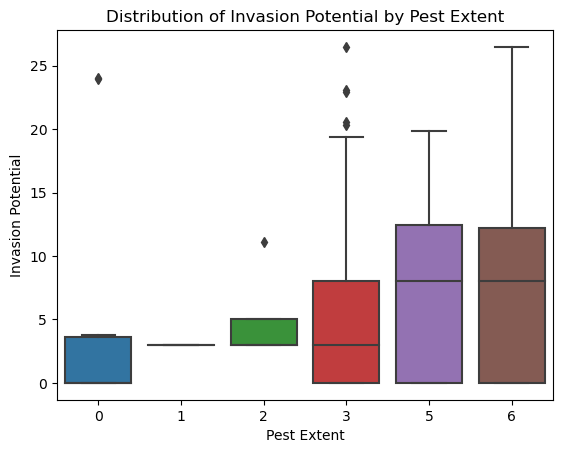

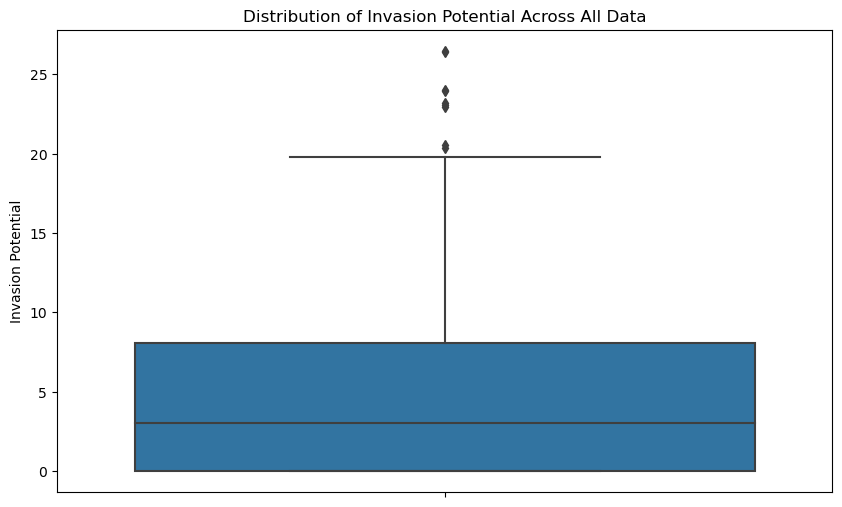

In [89]:
sns.boxplot(x=labels_df['Pest Extent'], y=labels_df['Invasion Potential'])
plt.title('Distribution of Invasion Potential by Pest Extent')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(y=labels_df['Invasion Potential'])
plt.title('Distribution of Invasion Potential Across All Data')
plt.ylabel('Invasion Potential')
plt.show()

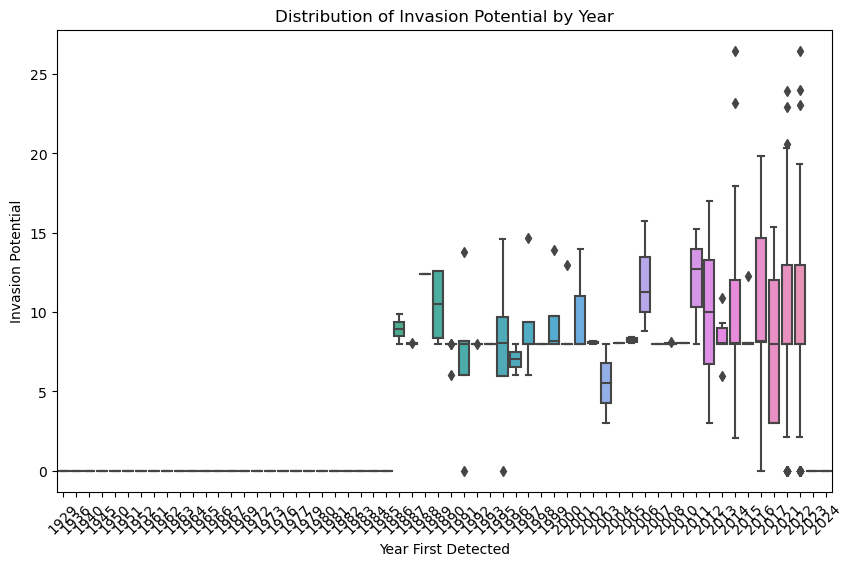

In [90]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=labels_df['Year First Detected'], y=labels_df['Invasion Potential'])
plt.title('Distribution of Invasion Potential by Year')
plt.xlabel('Year First Detected')
plt.ylabel('Invasion Potential')
plt.xticks(rotation=45) 
plt.show()

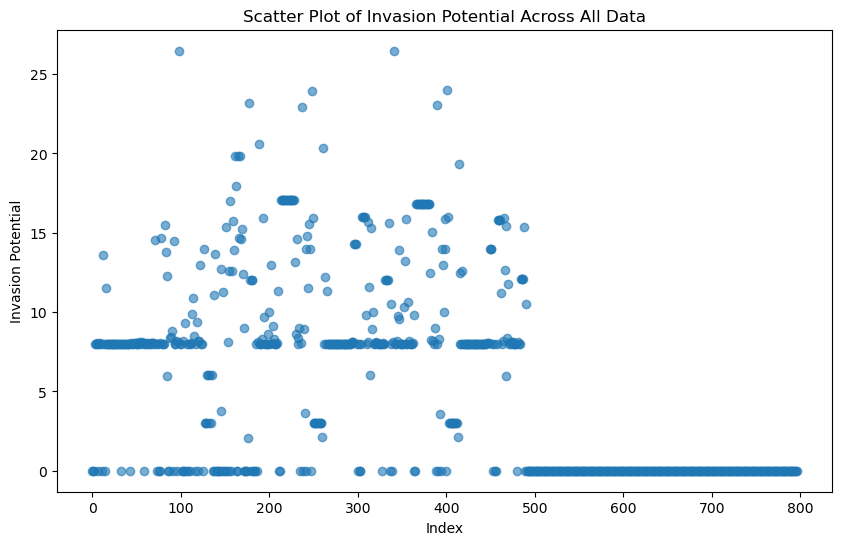

In [91]:
plt.figure(figsize=(10, 6))
plt.scatter(range(len(labels_df)), labels_df['Invasion Potential'], alpha=0.6)
plt.title('Scatter Plot of Invasion Potential Across All Data')
plt.ylabel('Invasion Potential')
plt.xlabel('Index')
plt.show()

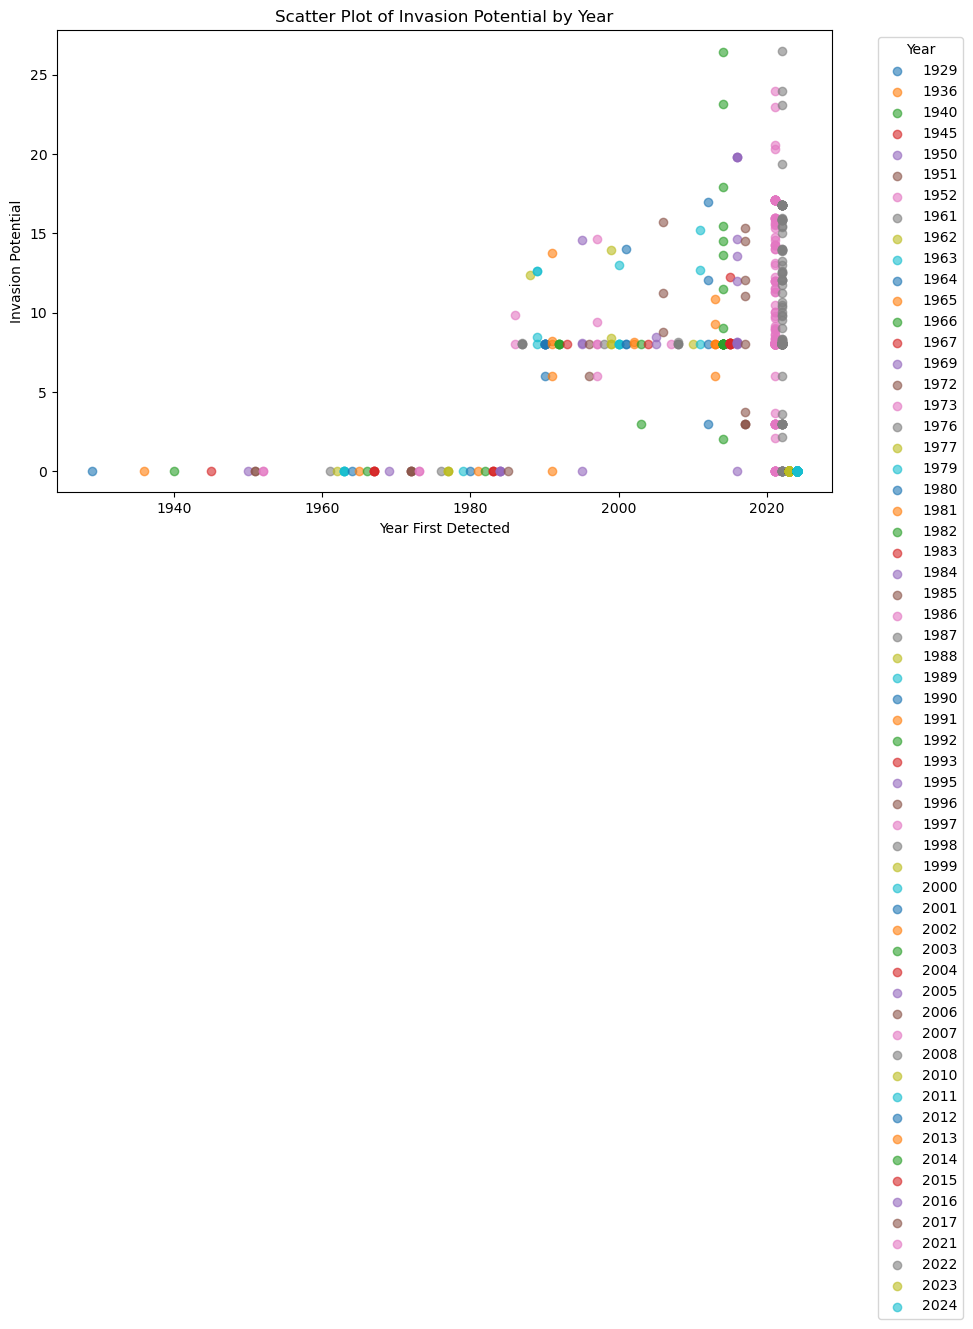

In [92]:
plt.figure(figsize=(10, 6))
for year in sorted(labels_df['Year First Detected'].unique()):
    subset = labels_df[labels_df['Year First Detected'] == year]
    plt.scatter([year] * len(subset), subset['Invasion Potential'], alpha=0.6, label=str(year))
plt.title('Scatter Plot of Invasion Potential by Year')
plt.xlabel('Year First Detected')
plt.ylabel('Invasion Potential')
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 753us/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 758us/step


C:\Users\tedhu\anaconda3.0\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\tedhu\anaconda3.0\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


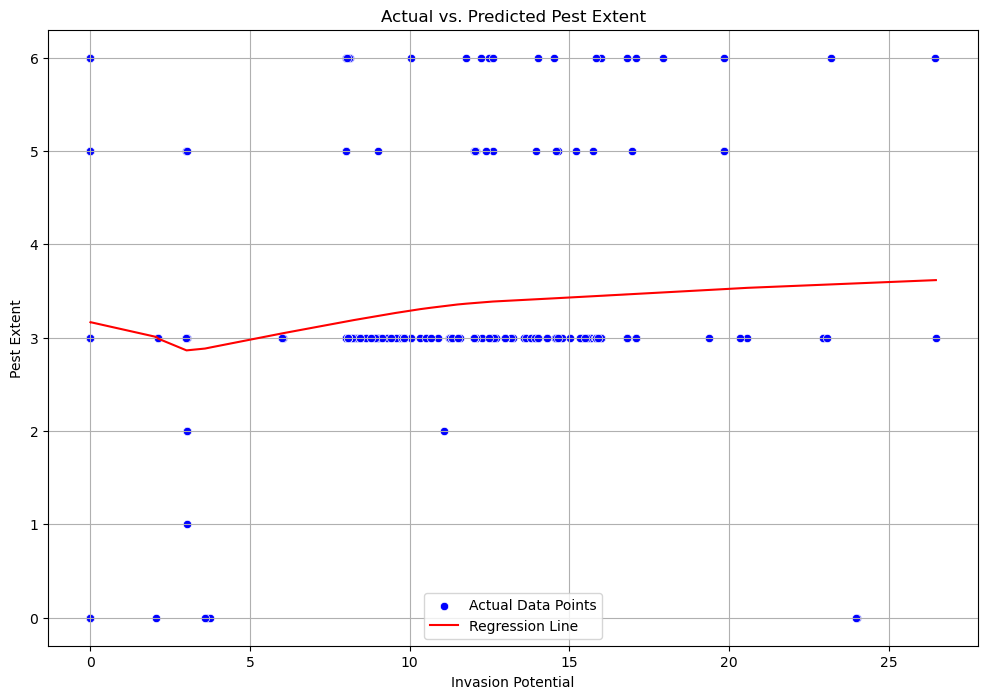

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns


y_pred_train = model.predict(X_train)
y_pred_val = model.predict(X_val)
y_pred_test = model.predict(X_test)


train_results = np.hstack((X_train, y_train.reshape(-1,1), y_pred_train))
val_results = np.hstack((X_val, y_val.reshape(-1,1), y_pred_val))
test_results = np.hstack((X_test, y_test.reshape(-1,1), y_pred_test))

all_results = np.vstack((train_results, val_results, test_results))
all_results_df = pd.DataFrame(all_results, columns=['Invasion Potential', 'Actual Pest Extent', 'Predicted Pest Extent'])

sorted_df = all_results_df.sort_values(by='Invasion Potential')

plt.figure(figsize=(12, 8))
sns.scatterplot(data=all_results_df, x='Invasion Potential', y='Actual Pest Extent', color='blue', label='Actual Data Points')
sns.lineplot(data=sorted_df, x='Invasion Potential', y='Predicted Pest Extent', color='red', label='Regression Line')
plt.title('Actual vs. Predicted Pest Extent')
plt.xlabel('Invasion Potential')
plt.ylabel('Pest Extent')
plt.legend()
plt.grid(True)
plt.show()


# Rounded Regression as Classification

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 706us/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 736us/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 620us/step
Training Classification Accuracy: 0.85
Validation Classification Accuracy: 0.87
Test Classification Accuracy: 0.89

Classification Report (Test Set):
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         4
         2.0       0.00      0.00      0.00         1
         3.0       0.90      1.00      0.95       142
         4.0       0.00      0.00      0.00         0
         5.0       0.00      0.00      0.00         6
         6.0       0.00      0.00      0.00         7

    accuracy                           0.89       160
   macro avg       0.15      0.17      0.16       160
weighted avg       0.80      0.89      0.84       160



C:\Users\tedhu\anaconda3.0\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\tedhu\anaconda3.0\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\tedhu\anaconda3.0\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\tedhu\anaconda3.0\Lib\site-packages\sklearn\metr

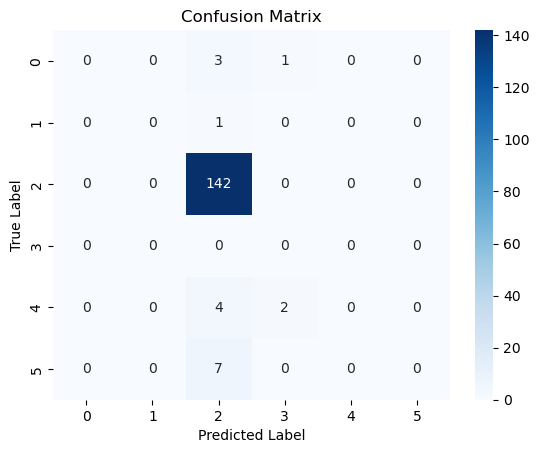

In [94]:
y_train_pred = model.predict(X_train).flatten()  
y_val_pred = model.predict(X_val).flatten()
y_test_pred = model.predict(X_test).flatten()

# Rounding the predictions to nearest integer for classification
y_train_pred_rounded = np.rint(y_train_pred)
y_val_pred_rounded = np.rint(y_val_pred)
y_test_pred_rounded = np.rint(y_test_pred)

# Evaluating classification accuracy
train_accuracy = accuracy_score(y_train, y_train_pred_rounded)
val_accuracy = accuracy_score(y_val, y_val_pred_rounded)
test_accuracy = accuracy_score(y_test, y_test_pred_rounded)

# Output classification accuracy
print(f"Training Classification Accuracy: {train_accuracy:.2f}")
print(f"Validation Classification Accuracy: {val_accuracy:.2f}")
print(f"Test Classification Accuracy: {test_accuracy:.2f}")

# Additional evaluation metrics
print("\nClassification Report (Test Set):")
print(classification_report(y_test, y_test_pred_rounded))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_test_pred_rounded)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


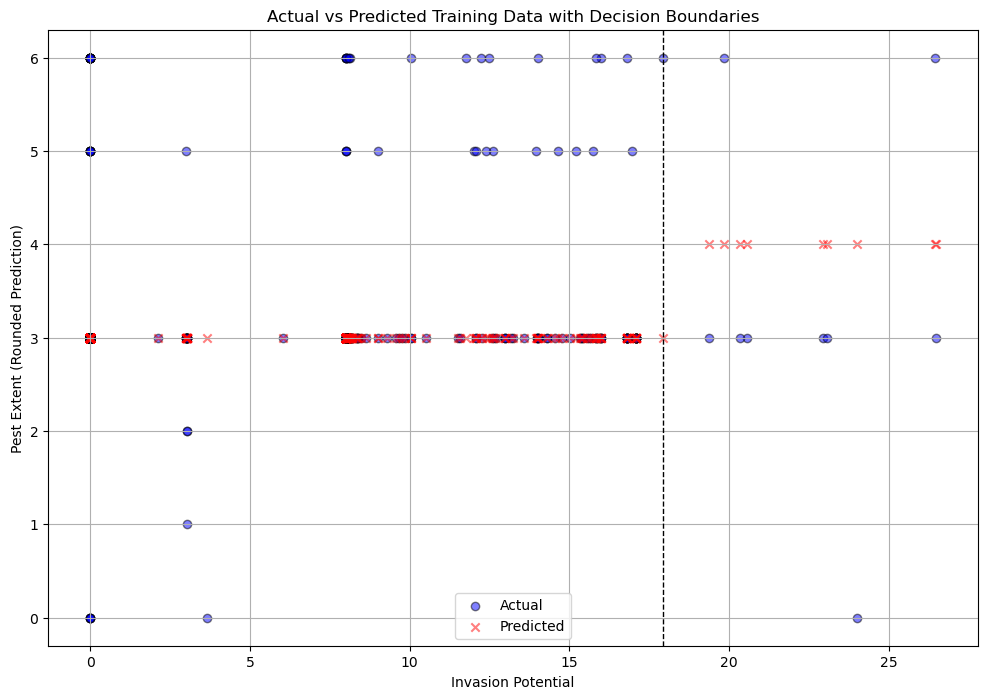

In [95]:
plt.figure(figsize=(12, 8))
plt.scatter(X_train, y_train, color='blue', label='Actual', alpha=0.5, edgecolor='k')
plt.scatter(X_train, y_train_pred_rounded, color='red', label='Predicted', alpha=0.5, marker='x')

sorted_indices = np.argsort(X_train.flatten())
sorted_X_train = X_train.flatten()[sorted_indices]
sorted_y_pred_rounded = y_train_pred_rounded[sorted_indices]

for i in range(len(sorted_X_train)-1):
    if sorted_y_pred_rounded[i] != sorted_y_pred_rounded[i+1]:
        plt.axvline(x=sorted_X_train[i], color='k', linestyle='--', lw=1)

plt.title('Actual vs Predicted Training Data with Decision Boundaries')
plt.xlabel('Invasion Potential')
plt.ylabel('Pest Extent (Rounded Prediction)')
plt.legend()
plt.grid(True)
plt.show()


# Duo-Model (Regression)

In [96]:
# Calculate invasion potential
def calculate_invasion_potential(import_country, year_detected):
    temp = temp_df.query("Country == @import_country and Year == @year_detected")['Annual mean temp (C)'].values
    precip = rain_df.query("Country == @import_country and Year == @year_detected")['Average precipitation (mm)'].values
    temp_factor = temp_modifier(temp[0] if len(temp) > 0 else 0)
    precip_factor = precip_modifier(precip[0] if len(precip) > 0 else 0)
    import_country_coords = country_coordinates.get(import_country)
    ip_contributions = []
    reporter_countries = trade_df.query("Year == @year_detected")['Reporter Countries'].unique()

    for reporter_country in reporter_countries:
        pest_extent = labels_df.query("Country == @reporter_country and `Year First Detected` <= @year_detected")['Pest Extent'].values
        trade_quantity = trade_df.query("`Reporter Countries` == @reporter_country and `Partner Countries` == @import_country and Year == @year_detected")['Tons'].sum()
        reporter_country_coords = country_coordinates.get(reporter_country)
        if import_country_coords and reporter_country_coords:
            distance = geodesic(import_country_coords, reporter_country_coords).kilometers
            ip_contribution = ((1 + trade_quantity) * (1 + (pest_extent[0] if len(pest_extent) > 0 else 0))) / (1 + distance ** attenuation if distance else 1)
            ip_contributions.append(ip_contribution)
    total_ip =  sum(ip_contributions)
    return total_ip

labels_df['Invasion Potential'] = labels_df.apply(lambda row: calculate_invasion_potential(row['Country'], row['Year First Detected']), axis=1)

# Prepare data for regression model
X = labels_df[['Invasion Potential']].values
y = labels_df['Pest Extent'].values.astype(float)  

# Splitting data
X_train, X_val_test, y_train, y_val_test = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.5, random_state=42)

# Model architecture
model = Sequential([
    Dense(100, activation='relu', input_shape=(1,)),
    Dense(100, activation='relu'),
    Dense(100, activation='relu'),
    Dense(100, activation='relu'),
    Dense(1)  # Single output node for regression
])

# Custom metric for Mean Error
def mean_error(y_true, y_pred):
    return K.mean(y_pred - y_true)

# Compiling the model
model.compile(optimizer='adam', 
              loss='mean_squared_error', 
              metrics=['mean_absolute_error', mean_error])

# Training model
history = model.fit(X_train, y_train, epochs=150, batch_size=32, validation_data=(X_val, y_val))

# Evaluating the model
train_mse, train_mae, train_me = model.evaluate(X_train, y_train, verbose=0)
val_mse, val_mae, val_me = model.evaluate(X_val, y_val, verbose=0)
test_mse, test_mae, test_me = model.evaluate(X_test, y_test, verbose=0)




Epoch 1/150


C:\Users\tedhu\anaconda3.0\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 9.2650 - mean_absolute_error: 2.8304 - mean_error: -2.7939 - val_loss: 4.8376 - val_mean_absolute_error: 1.8534 - val_mean_error: -1.0599
Epoch 2/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.9907 - mean_absolute_error: 1.8576 - mean_error: -1.0359 - val_loss: 3.5858 - val_mean_absolute_error: 1.4460 - val_mean_error: -1.3257
Epoch 3/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.4981 - mean_absolute_error: 1.4178 - mean_error: -1.1079 - val_loss: 1.7677 - val_mean_absolute_error: 1.0235 - val_mean_error: -0.6924
Epoch 4/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.6270 - mean_absolute_error: 0.9263 - mean_error: -0.4505 - val_loss: 0.7685 - val_mean_absolute_error: 0.5367 - val_mean_error: 0.1647
Epoch 5/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0619 - mean_absolute_error: 0.6673 - mean_error: 0.0573 - val_loss: 0.7780 - val_mean_absolute_error: 0.4799 - val_mean_error: 0.0734
Epoch 6/150
15/15 ━━━━━━━━━━━

In [97]:
# Output results
print(f"Training - MSE: {train_mse:.2f}, MAE: {train_mae:.2f}, ME: {train_me:.2f}")
print(f"Validation - MSE: {val_mse:.2f}, MAE: {val_mae:.2f}, ME: {val_me:.2f}")
print(f"Test - MSE: {test_mse:.2f}, MAE: {test_mae:.2f}, ME: {test_me:.2f}")

Training - MSE: 0.91, MAE: 0.44, ME: -0.16
Validation - MSE: 0.75, MAE: 0.38, ME: -0.07
Test - MSE: 0.71, MAE: 0.37, ME: -0.02


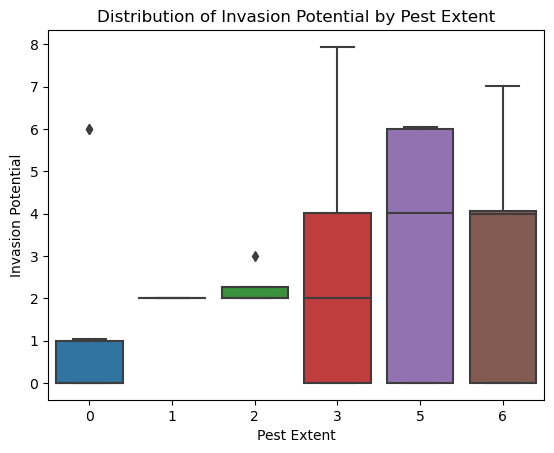

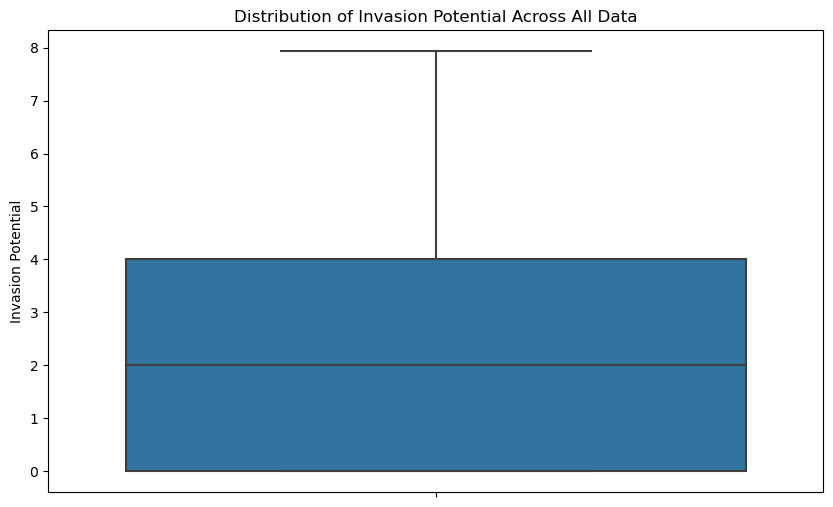

In [98]:
sns.boxplot(x=labels_df['Pest Extent'], y=labels_df['Invasion Potential'])
plt.title('Distribution of Invasion Potential by Pest Extent')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(y=labels_df['Invasion Potential'])
plt.title('Distribution of Invasion Potential Across All Data')
plt.ylabel('Invasion Potential')
plt.show()

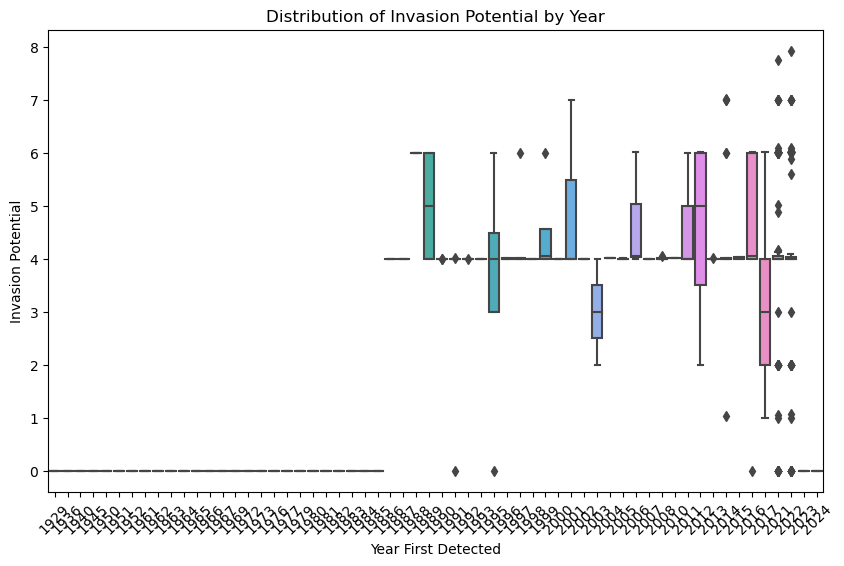

In [99]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=labels_df['Year First Detected'], y=labels_df['Invasion Potential'])
plt.title('Distribution of Invasion Potential by Year')
plt.xlabel('Year First Detected')
plt.ylabel('Invasion Potential')
plt.xticks(rotation=45) 
plt.show()

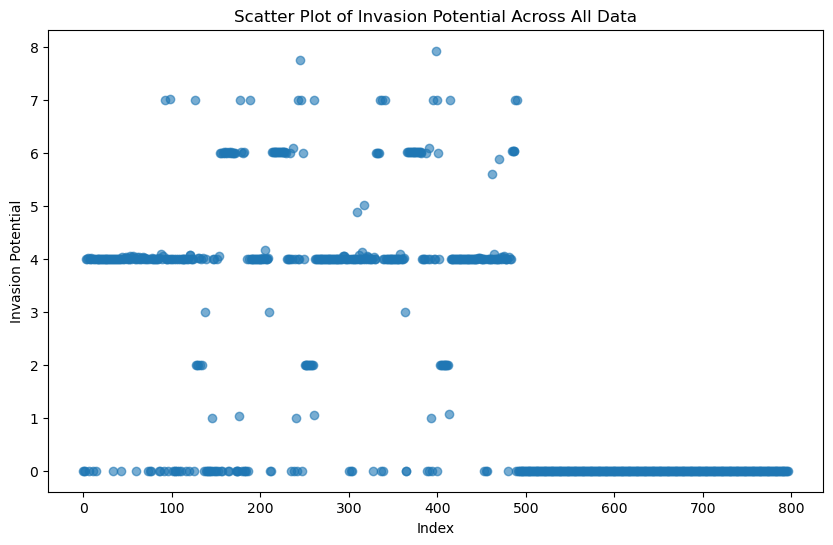

In [100]:
plt.figure(figsize=(10, 6))
plt.scatter(range(len(labels_df)), labels_df['Invasion Potential'], alpha=0.6)
plt.title('Scatter Plot of Invasion Potential Across All Data')
plt.ylabel('Invasion Potential')
plt.xlabel('Index')
plt.show()

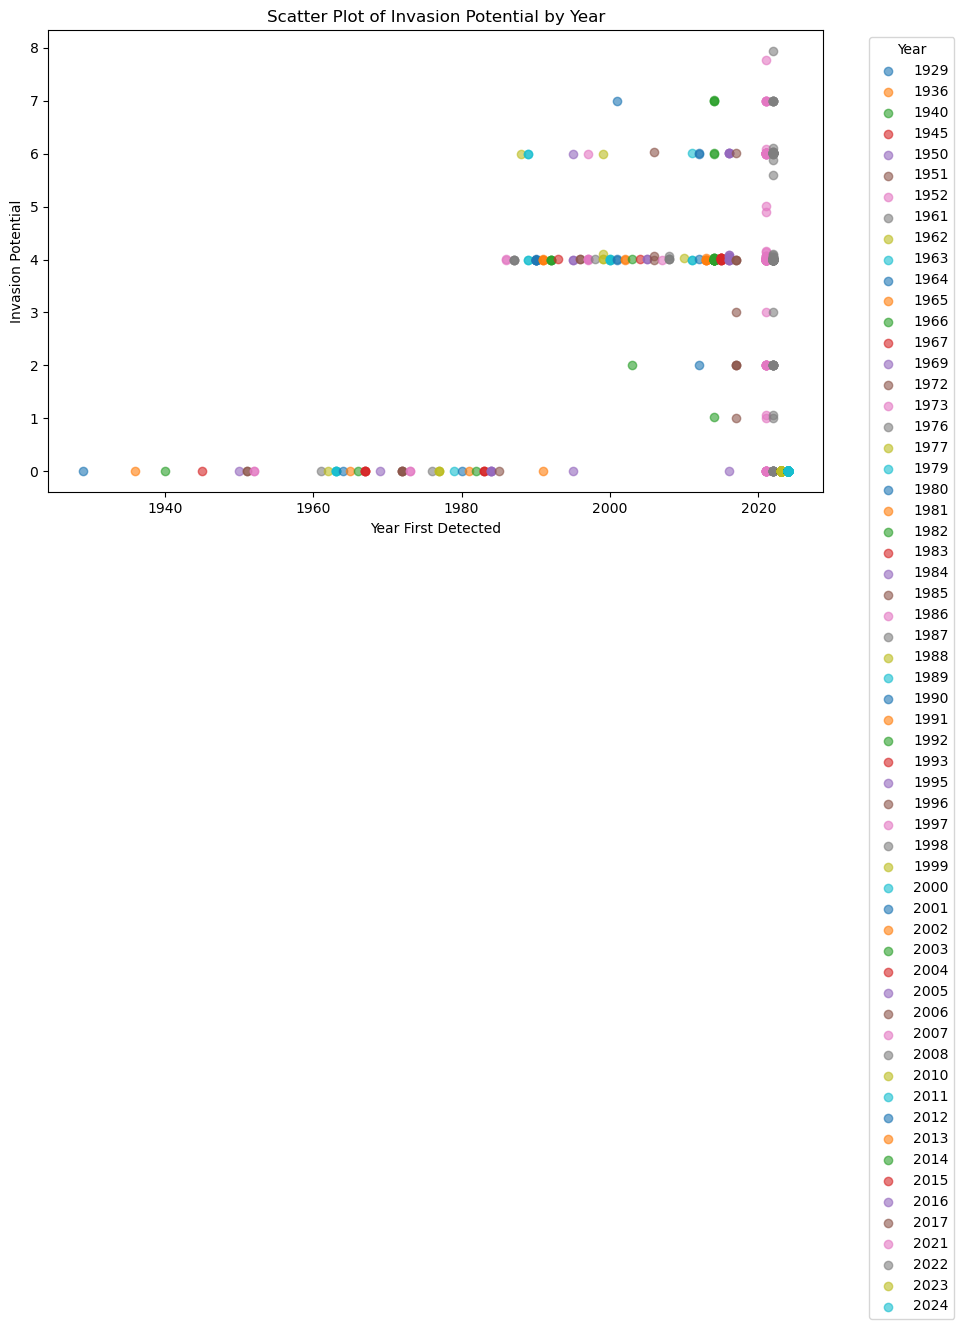

In [101]:
plt.figure(figsize=(10, 6))
for year in sorted(labels_df['Year First Detected'].unique()):
    subset = labels_df[labels_df['Year First Detected'] == year]
    plt.scatter([year] * len(subset), subset['Invasion Potential'], alpha=0.6, label=str(year))
plt.title('Scatter Plot of Invasion Potential by Year')
plt.xlabel('Year First Detected')
plt.ylabel('Invasion Potential')
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 876us/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 744us/step


C:\Users\tedhu\anaconda3.0\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\tedhu\anaconda3.0\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


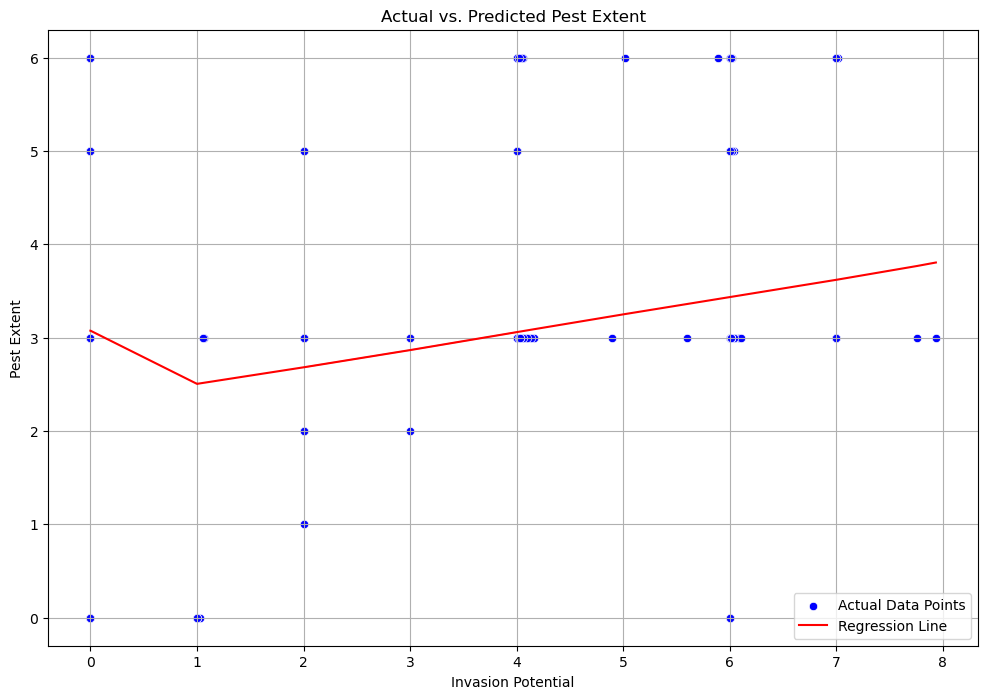

In [102]:
y_pred_train = model.predict(X_train)
y_pred_val = model.predict(X_val)
y_pred_test = model.predict(X_test)


train_results = np.hstack((X_train, y_train.reshape(-1,1), y_pred_train))
val_results = np.hstack((X_val, y_val.reshape(-1,1), y_pred_val))
test_results = np.hstack((X_test, y_test.reshape(-1,1), y_pred_test))

all_results = np.vstack((train_results, val_results, test_results))
all_results_df = pd.DataFrame(all_results, columns=['Invasion Potential', 'Actual Pest Extent', 'Predicted Pest Extent'])

sorted_df = all_results_df.sort_values(by='Invasion Potential')

plt.figure(figsize=(12, 8))
sns.scatterplot(data=all_results_df, x='Invasion Potential', y='Actual Pest Extent', color='blue', label='Actual Data Points')
sns.lineplot(data=sorted_df, x='Invasion Potential', y='Predicted Pest Extent', color='red', label='Regression Line')
plt.title('Actual vs. Predicted Pest Extent')
plt.xlabel('Invasion Potential')
plt.ylabel('Pest Extent')
plt.legend()
plt.grid(True)
plt.show()


# Rounded Regression as Classification

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 673us/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 745us/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 743us/step
Training Classification Accuracy: 0.84
Validation Classification Accuracy: 0.87
Test Classification Accuracy: 0.87

Classification Report (Test Set):
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         4
         2.0       0.00      0.00      0.00         1
         3.0       0.89      0.98      0.93       142
         4.0       0.00      0.00      0.00         0
         5.0       0.00      0.00      0.00         6
         6.0       0.00      0.00      0.00         7

    accuracy                           0.87       160
   macro avg       0.15      0.16      0.16       160
weighted avg       0.79      0.87      0.83       160



C:\Users\tedhu\anaconda3.0\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\tedhu\anaconda3.0\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\tedhu\anaconda3.0\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\tedhu\anaconda3.0\Lib\site-packages\sklearn\metr

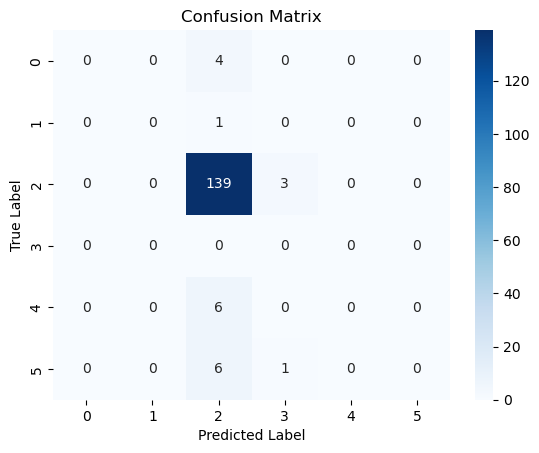

In [103]:
y_train_pred = model.predict(X_train).flatten()  
y_val_pred = model.predict(X_val).flatten()
y_test_pred = model.predict(X_test).flatten()

y_train_pred_rounded = np.rint(y_train_pred)
y_val_pred_rounded = np.rint(y_val_pred)
y_test_pred_rounded = np.rint(y_test_pred)

train_accuracy = accuracy_score(y_train, y_train_pred_rounded)
val_accuracy = accuracy_score(y_val, y_val_pred_rounded)
test_accuracy = accuracy_score(y_test, y_test_pred_rounded)

print(f"Training Classification Accuracy: {train_accuracy:.2f}")
print(f"Validation Classification Accuracy: {val_accuracy:.2f}")
print(f"Test Classification Accuracy: {test_accuracy:.2f}")

print("\nClassification Report (Test Set):")
print(classification_report(y_test, y_test_pred_rounded))

conf_matrix = confusion_matrix(y_test, y_test_pred_rounded)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


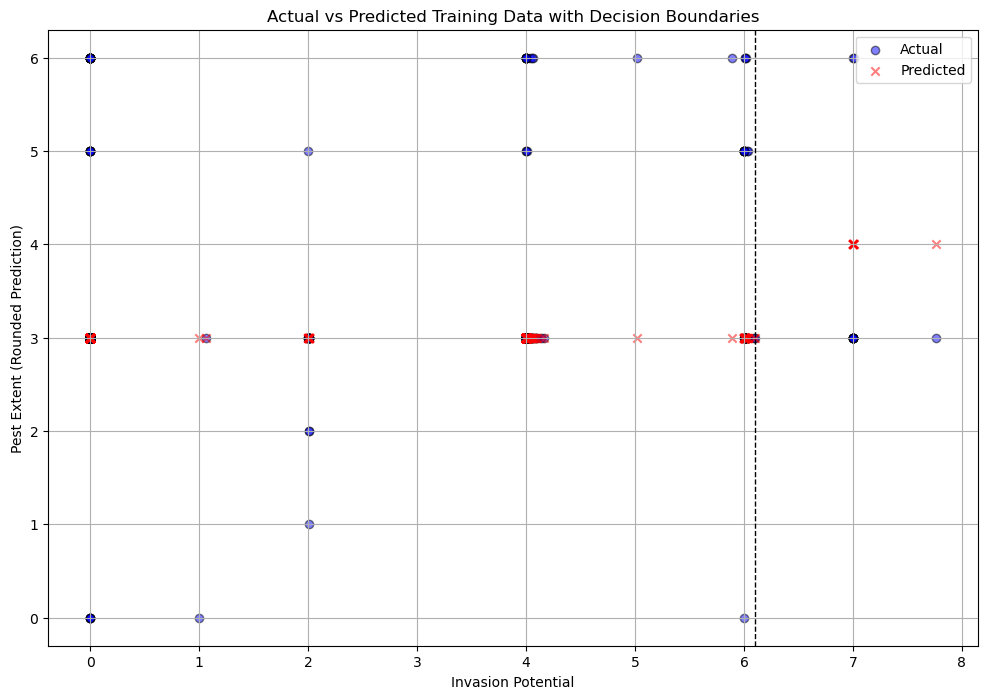

In [104]:
plt.figure(figsize=(12, 8))
plt.scatter(X_train, y_train, color='blue', label='Actual', alpha=0.5, edgecolor='k')
plt.scatter(X_train, y_train_pred_rounded, color='red', label='Predicted', alpha=0.5, marker='x')

sorted_indices = np.argsort(X_train.flatten())
sorted_X_train = X_train.flatten()[sorted_indices]
sorted_y_pred_rounded = y_train_pred_rounded[sorted_indices]

for i in range(len(sorted_X_train)-1):
    if sorted_y_pred_rounded[i] != sorted_y_pred_rounded[i+1]:
        plt.axvline(x=sorted_X_train[i], color='k', linestyle='--', lw=1)

plt.title('Actual vs Predicted Training Data with Decision Boundaries')
plt.xlabel('Invasion Potential')
plt.ylabel('Pest Extent (Rounded Prediction)')
plt.legend()
plt.grid(True)
plt.show()


# Single-Model

In [105]:
# Calculate invasion potential
def calculate_invasion_potential(import_country, year_detected):
    temp = temp_df.query("Country == @import_country and Year == @year_detected")['Annual mean temp (C)'].values
    precip = rain_df.query("Country == @import_country and Year == @year_detected")['Average precipitation (mm)'].values
    temp_factor = temp_modifier(temp[0] if len(temp) > 0 else 0)
    precip_factor = precip_modifier(precip[0] if len(precip) > 0 else 0)
    import_country_coords = country_coordinates.get(import_country)
    ip_contributions = []
    reporter_countries = trade_df.query("Year == @year_detected")['Reporter Countries'].unique()

    for reporter_country in reporter_countries:
        pest_extent = labels_df.query("Country == @reporter_country and `Year First Detected` <= @year_detected")['Pest Extent'].values
        trade_quantity = trade_df.query("`Reporter Countries` == @reporter_country and `Partner Countries` == @import_country and Year == @year_detected")['Tons'].sum()
        reporter_country_coords = country_coordinates.get(reporter_country)
        if import_country_coords and reporter_country_coords:
            distance = geodesic(import_country_coords, reporter_country_coords).kilometers
            ip_contribution = ((1 + (pest_extent[0] if len(pest_extent) > 0 else 0)) / (1 + distance ** attenuation if distance else 1))
            ip_contributions.append(ip_contribution)
    total_ip =  sum(ip_contributions)
    return total_ip

labels_df['Invasion Potential'] = labels_df.apply(lambda row: calculate_invasion_potential(row['Country'], row['Year First Detected']), axis=1)

# Prepare data for regression model
X = labels_df[['Invasion Potential']].values
y = labels_df['Pest Extent'].values.astype(float)  

# Splitting data
X_train, X_val_test, y_train, y_val_test = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.5, random_state=42)

# Model architecture
model = Sequential([
    Dense(100, activation='relu', input_shape=(1,)),
    Dense(100, activation='relu'),
    Dense(100, activation='relu'),
    Dense(100, activation='relu'),
    Dense(1)  
])


# Custom metric for Mean Error
def mean_error(y_true, y_pred):
    return K.mean(y_pred - y_true)

# Compiling the model
model.compile(optimizer='adam', 
              loss='mean_squared_error', 
              metrics=['mean_absolute_error', mean_error])

# Training model
history = model.fit(X_train, y_train, epochs=150, batch_size=32, validation_data=(X_val, y_val))

# Evaluating the model
train_mse, train_mae, train_me = model.evaluate(X_train, y_train, verbose=0)
val_mse, val_mae, val_me = model.evaluate(X_val, y_val, verbose=0)
test_mse, test_mae, test_me = model.evaluate(X_test, y_test, verbose=0)



Epoch 1/150


C:\Users\tedhu\anaconda3.0\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 9.2410 - mean_absolute_error: 2.7789 - mean_error: -2.7314 - val_loss: 4.9072 - val_mean_absolute_error: 1.8937 - val_mean_error: -1.0086
Epoch 2/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.1879 - mean_absolute_error: 1.9069 - mean_error: -0.9841 - val_loss: 3.6883 - val_mean_absolute_error: 1.4179 - val_mean_error: -1.3010
Epoch 3/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.7761 - mean_absolute_error: 1.5306 - mean_error: -1.0894 - val_loss: 2.2435 - val_mean_absolute_error: 1.1067 - val_mean_error: -0.9183
Epoch 4/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.0957 - mean_absolute_error: 1.0793 - mean_error: -0.7043 - val_loss: 0.7842 - val_mean_absolute_error: 0.5189 - val_mean_error: -0.0898
Epoch 5/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0370 - mean_absolute_error: 0.6389 - mean_error: -0.0074 - val_loss: 0.8133 - val_mean_absolute_error: 0.4987 - val_mean_error: 0.0846
Epoch 6/150
15/15 ━━━━━━━━━

In [106]:
# Output results
print(f"Training - MSE: {train_mse:.2f}, MAE: {train_mae:.2f}, ME: {train_me:.2f}")
print(f"Validation - MSE: {val_mse:.2f}, MAE: {val_mae:.2f}, ME: {val_me:.2f}")
print(f"Test - MSE: {test_mse:.2f}, MAE: {test_mae:.2f}, ME: {test_me:.2f}")


Training - MSE: 0.92, MAE: 0.44, ME: -0.16
Validation - MSE: 0.76, MAE: 0.38, ME: -0.07
Test - MSE: 0.71, MAE: 0.37, ME: -0.02


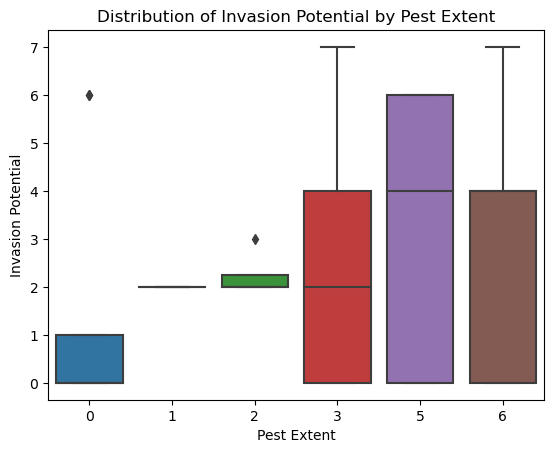

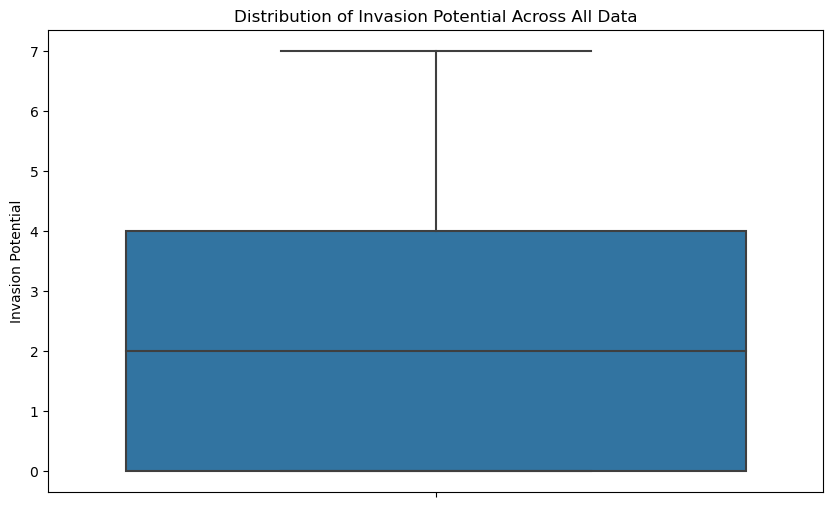

In [107]:
sns.boxplot(x=labels_df['Pest Extent'], y=labels_df['Invasion Potential'])
plt.title('Distribution of Invasion Potential by Pest Extent')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(y=labels_df['Invasion Potential'])
plt.title('Distribution of Invasion Potential Across All Data')
plt.ylabel('Invasion Potential')
plt.show()

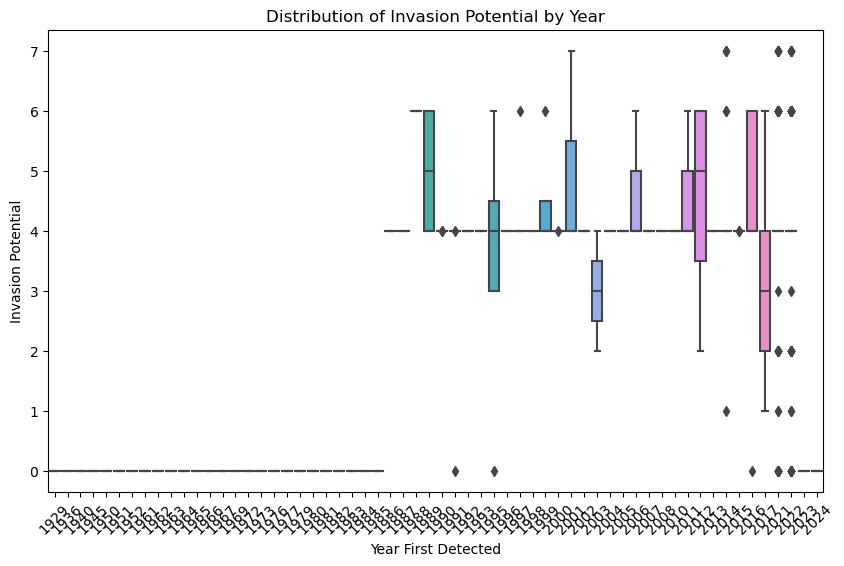

In [108]:

plt.figure(figsize=(10, 6))
sns.boxplot(x=labels_df['Year First Detected'], y=labels_df['Invasion Potential'])
plt.title('Distribution of Invasion Potential by Year')
plt.xlabel('Year First Detected')
plt.ylabel('Invasion Potential')
plt.xticks(rotation=45)  # Rotating x-labels for better visibility
plt.show()

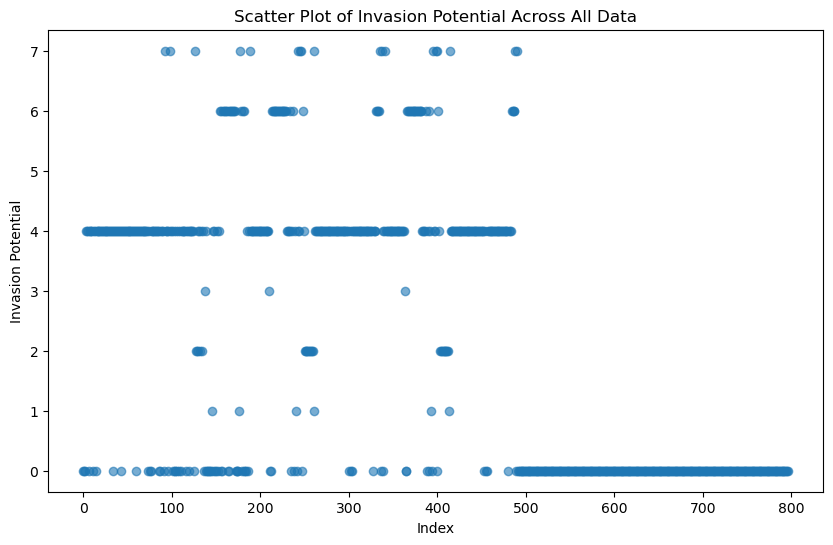

In [109]:
plt.figure(figsize=(10, 6))
plt.scatter(range(len(labels_df)), labels_df['Invasion Potential'], alpha=0.6)
plt.title('Scatter Plot of Invasion Potential Across All Data')
plt.ylabel('Invasion Potential')
plt.xlabel('Index')
plt.show()

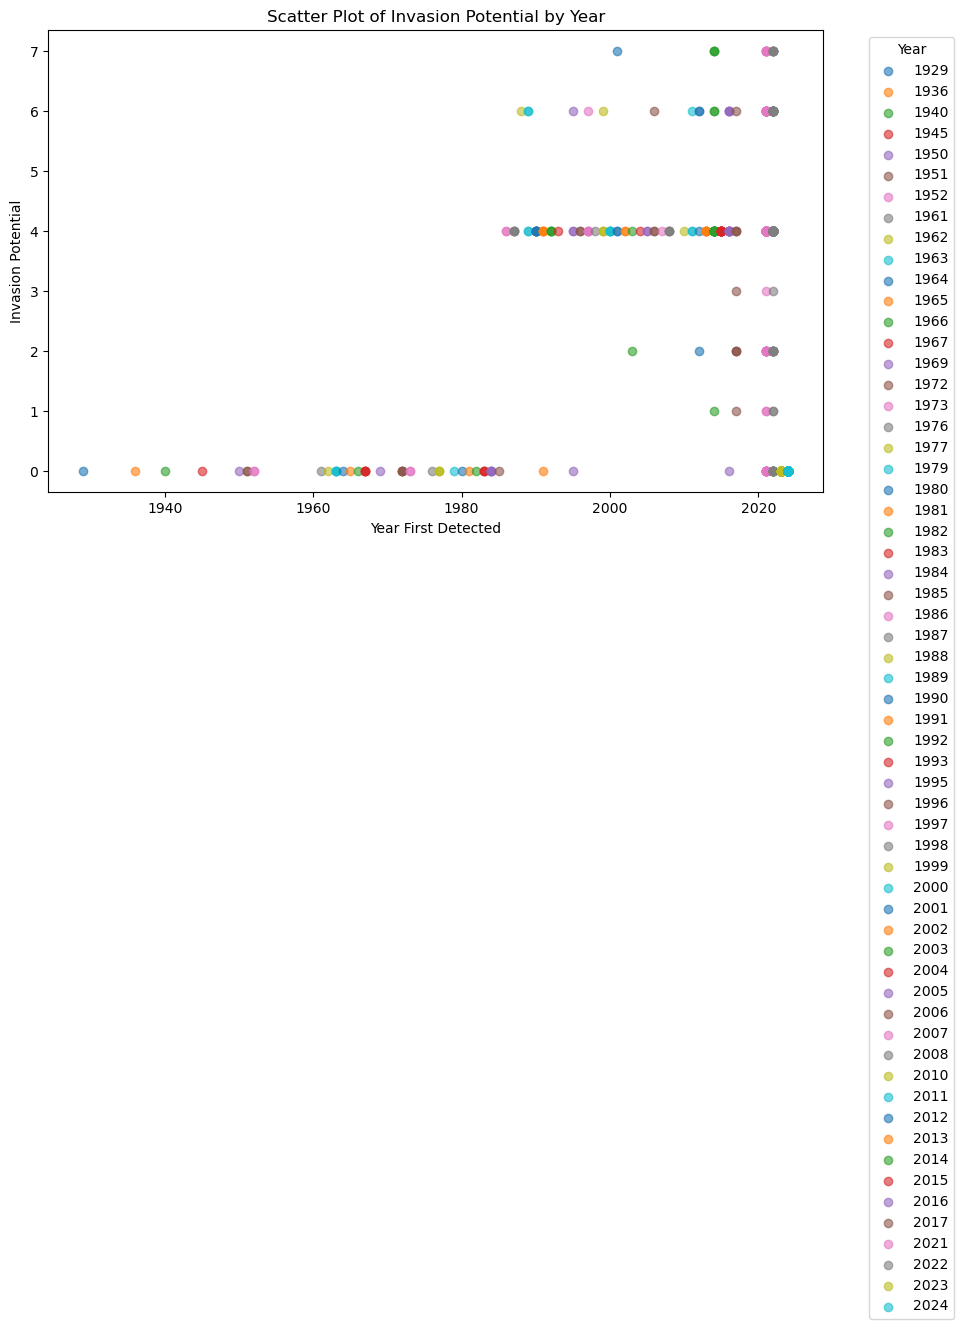

In [110]:
plt.figure(figsize=(10, 6))
for year in sorted(labels_df['Year First Detected'].unique()):
    subset = labels_df[labels_df['Year First Detected'] == year]
    plt.scatter([year] * len(subset), subset['Invasion Potential'], alpha=0.6, label=str(year))
plt.title('Scatter Plot of Invasion Potential by Year')
plt.xlabel('Year First Detected')
plt.ylabel('Invasion Potential')
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 753us/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 742us/step


C:\Users\tedhu\anaconda3.0\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\tedhu\anaconda3.0\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


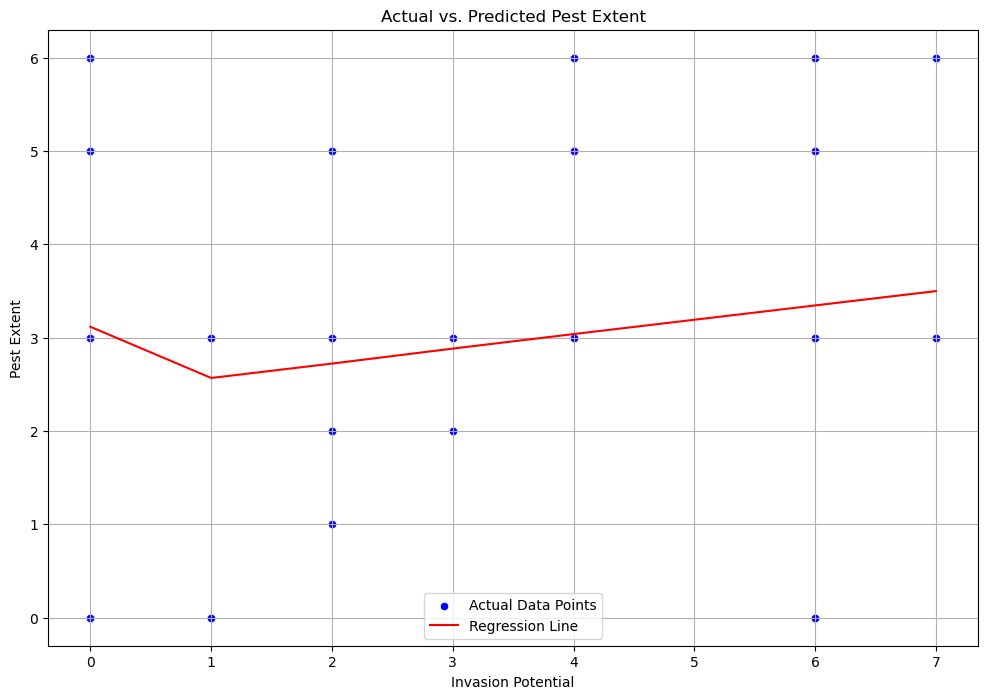

In [111]:
y_pred_train = model.predict(X_train)
y_pred_val = model.predict(X_val)
y_pred_test = model.predict(X_test)

train_results = np.hstack((X_train, y_train.reshape(-1,1), y_pred_train))
val_results = np.hstack((X_val, y_val.reshape(-1,1), y_pred_val))
test_results = np.hstack((X_test, y_test.reshape(-1,1), y_pred_test))

all_results = np.vstack((train_results, val_results, test_results))
all_results_df = pd.DataFrame(all_results, columns=['Invasion Potential', 'Actual Pest Extent', 'Predicted Pest Extent'])

sorted_df = all_results_df.sort_values(by='Invasion Potential')

plt.figure(figsize=(12, 8))
sns.scatterplot(data=all_results_df, x='Invasion Potential', y='Actual Pest Extent', color='blue', label='Actual Data Points')
sns.lineplot(data=sorted_df, x='Invasion Potential', y='Predicted Pest Extent', color='red', label='Regression Line')
plt.title('Actual vs. Predicted Pest Extent')
plt.xlabel('Invasion Potential')
plt.ylabel('Pest Extent')
plt.legend()
plt.grid(True)
plt.show()


# Rounded Regression as classification

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 602us/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 881us/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 756us/step
Training Classification Accuracy: 0.86
Validation Classification Accuracy: 0.87
Test Classification Accuracy: 0.89

Classification Report (Test Set):
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         4
         2.0       0.00      0.00      0.00         1
         3.0       0.89      1.00      0.94       142
         5.0       0.00      0.00      0.00         6
         6.0       0.00      0.00      0.00         7

    accuracy                           0.89       160
   macro avg       0.18      0.20      0.19       160
weighted avg       0.79      0.89      0.83       160



C:\Users\tedhu\anaconda3.0\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\tedhu\anaconda3.0\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\tedhu\anaconda3.0\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


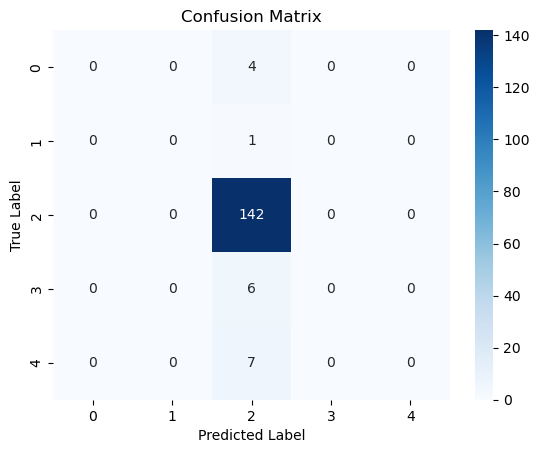

In [112]:
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Predicting with the model
y_train_pred = model.predict(X_train).flatten() 
y_val_pred = model.predict(X_val).flatten()
y_test_pred = model.predict(X_test).flatten()

y_train_pred_rounded = np.rint(y_train_pred)
y_val_pred_rounded = np.rint(y_val_pred)
y_test_pred_rounded = np.rint(y_test_pred)

# Evaluating classification accuracy
train_accuracy = accuracy_score(y_train, y_train_pred_rounded)
val_accuracy = accuracy_score(y_val, y_val_pred_rounded)
test_accuracy = accuracy_score(y_test, y_test_pred_rounded)

# Output classification accuracy
print(f"Training Classification Accuracy: {train_accuracy:.2f}")
print(f"Validation Classification Accuracy: {val_accuracy:.2f}")
print(f"Test Classification Accuracy: {test_accuracy:.2f}")

# Additional evaluation metrics
print("\nClassification Report (Test Set):")
print(classification_report(y_test, y_test_pred_rounded))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_test_pred_rounded)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


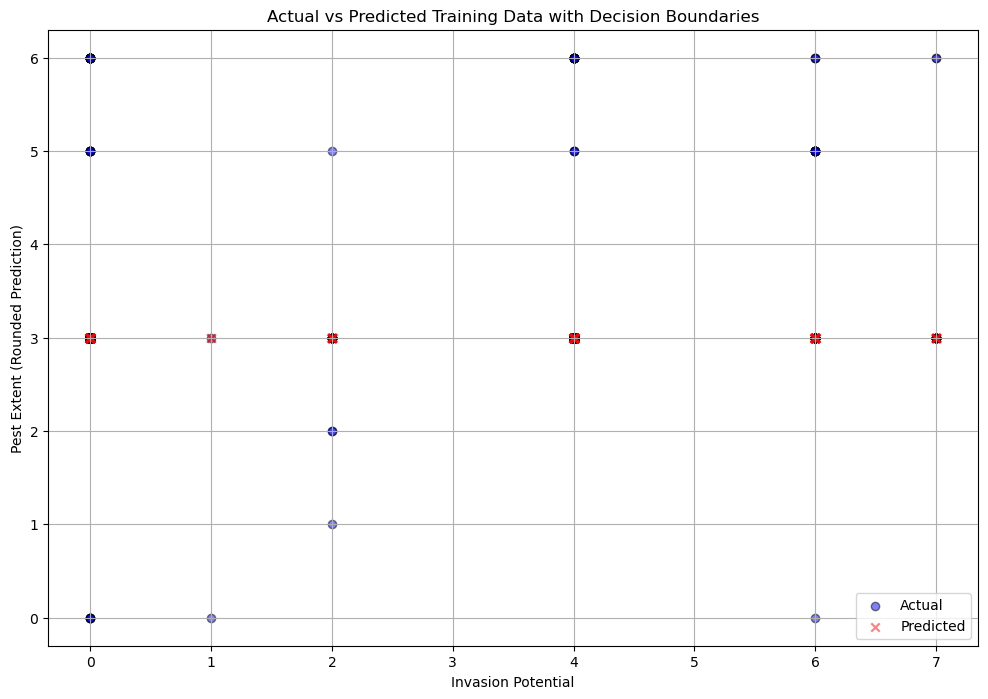

In [113]:
plt.figure(figsize=(12, 8))
plt.scatter(X_train, y_train, color='blue', label='Actual', alpha=0.5, edgecolor='k')
plt.scatter(X_train, y_train_pred_rounded, color='red', label='Predicted', alpha=0.5, marker='x')

sorted_indices = np.argsort(X_train.flatten())
sorted_X_train = X_train.flatten()[sorted_indices]
sorted_y_pred_rounded = y_train_pred_rounded[sorted_indices]

for i in range(len(sorted_X_train)-1):
    if sorted_y_pred_rounded[i] != sorted_y_pred_rounded[i+1]:
        plt.axvline(x=sorted_X_train[i], color='k', linestyle='--', lw=1)

plt.title('Actual vs Predicted Training Data with Decision Boundaries')
plt.xlabel('Invasion Potential')
plt.ylabel('Pest Extent (Rounded Prediction)')
plt.legend()
plt.grid(True)
plt.show()
